### Carga de datos y configuracion de paquetes

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression

directory = os.path.join(os.getcwd() , "proyecto_data", "proyecto_training_data.npy")
all_data_np = np.load(file=directory, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

all_data_df = pd.DataFrame({'SalePrice': all_data_np[:,0], 
                            'OverallQual': all_data_np[:,1],
                            '1stFlrSF': all_data_np[:,2],
                            "TotRmsAbvGrd": all_data_np[:,3],
                            "YearBuilt": all_data_np[:,4],
                            "LotFrontage": all_data_np[:,5]
                           })

### Creacion de set de datos de entrenamiento 80% y valiacion 20%

In [5]:
data_training_np, data_validation_np = train_test_split(all_data_np, test_size=0.2, shuffle=True, random_state=1989)
#Descomentar el codigo si queremos seleccionar el 80% desde el numpy array
#data_training_np = all_data_np[0: int(all_data_np.shape[0]*0.8) ]
data_training_df = pd.DataFrame({'SalePrice': data_training_np[:,0], 
                            'OverallQual': data_training_np[:,1],
                            '1stFlrSF': data_training_np[:,2],
                            "TotRmsAbvGrd": data_training_np[:,3],
                            "YearBuilt": data_training_np[:,4],
                            "LotFrontage": data_training_np[:,5]
                           })

#Descomentar el codigo si queremos seleccionar el 20% desde el numpy array
#data_validation_np = all_data_np[int(all_data_np.shape[0]*0.8) : all_data_np.shape[0] ]
data_validation_df = pd.DataFrame({'SalePrice': data_validation_np[:,0], 
                            'OverallQual': data_validation_np[:,1],
                            '1stFlrSF': data_validation_np[:,2],
                            "TotRmsAbvGrd": data_validation_np[:,3],
                            "YearBuilt": data_validation_np[:,4],
                            "LotFrontage": data_validation_np[:,5]
                           })


### Analisis Exploratorio

In [6]:
sales_price_mean = all_data_np[:,0].mean()
sales_price_max = all_data_np[:,0].max()
sales_price_min = all_data_np[:,0].min()
sales_price_var = all_data_np[:,0].var()
sales_price_range = all_data_np[:,0].ptp()
sales_price_std = all_data_np[:,0].std()


print("La variable precio de ventas tiene:\n Una media de {} \n Un valor maximo de {} \n Un valor minimo de {} \n Una varianza de {} \n Una desviacion estardan de {} \n Un Rango {} ".
      format(sales_price_mean, sales_price_max, sales_price_min, sales_price_var, sales_price_std, sales_price_range ))


La variable precio de ventas tiene:
 Una media de 180921.19589041095 
 Un valor maximo de 755000.0 
 Un valor minimo de 34900.0 
 Una varianza de 6306788585.349299 
 Una desviacion estardan de 79415.29188606751 
 Un Rango 720100.0 


In [7]:
qual_mean = all_data_df["OverallQual"].mean()
qual_price_max = all_data_df["OverallQual"].max()
qual_price_min = all_data_df["OverallQual"].min()
qual_price_var = all_data_df["OverallQual"].var()
qual_price_range = np.ptp(all_data_df["OverallQual"])
qual_price_std = all_data_df["OverallQual"].std()


print("La clasificacion general de las propiedades tiene:\n Una media de {} \n Un valor maximo de {} \n Un valor minimo de {} \n Una varianza de {} \n Una desviacion estardan de {} \n Un Rango {} ".
      format(qual_mean, qual_price_max, qual_price_min, qual_price_var, qual_price_std, qual_price_range ))

La clasificacion general de las propiedades tiene:
 Una media de 6.0993150684931505 
 Un valor maximo de 10.0 
 Un valor minimo de 1.0 
 Una varianza de 1.9126794482991696 
 Una desviacion estardan de 1.3829965467415923 
 Un Rango 9.0 


In [8]:
size_mean = all_data_df["1stFlrSF"].mean()
size_price_max = all_data_df["1stFlrSF"].max()
size_price_min = all_data_df["1stFlrSF"].min()
size_price_var = all_data_df["1stFlrSF"].var()
size_price_range =  np.ptp(all_data_df["1stFlrSF"])
size_price_std = all_data_df["1stFlrSF"].std()

print("El tamanho de las propiedades tiene:\n Una media de {} \n Un valor maximo de {} \n Un valor minimo de {} \n Una varianza de {} \n Una desviacion estardan de {} \n Un Rango {} ".
      format(size_mean, size_price_max, size_price_min, size_price_var, size_price_std, size_price_range ))

El tamanho de las propiedades tiene:
 Una media de 1162.626712328767 
 Un valor maximo de 4692.0 
 Un valor minimo de 334.0 
 Una varianza de 149450.07920371392 
 Una desviacion estardan de 386.5877380410738 
 Un Rango 4358.0 


In [9]:
rooms_mean = all_data_df["TotRmsAbvGrd"].mean()
rooms_price_max = all_data_df["TotRmsAbvGrd"].max()
rooms_price_min = all_data_df["TotRmsAbvGrd"].min()
rooms_price_var = all_data_df["TotRmsAbvGrd"].var()
rooms_price_range = np.ptp(all_data_df["TotRmsAbvGrd"])
rooms_price_std = all_data_df["TotRmsAbvGrd"].std()

print("El total de habitaciones de las propiedades  tiene:\n Una media de {} \n Un valor maximo de {} \n Un valor minimo de {} \n Una varianza de {} \n Una desviacion estardan de {}  \n Un Rango {}".
      format(rooms_mean, rooms_price_max, rooms_price_min, rooms_price_var, rooms_price_std, rooms_price_range ))

El total de habitaciones de las propiedades  tiene:
 Una media de 6.517808219178082 
 Un valor maximo de 14.0 
 Un valor minimo de 2.0 
 Una varianza de 2.6419033490756916 
 Una desviacion estardan de 1.625393290584064  
 Un Rango 12.0


In [10]:
year_mean = all_data_df["YearBuilt"].mean()
year_price_max = all_data_df["YearBuilt"].max()
year_price_min = all_data_df["YearBuilt"].min()
year_price_var = all_data_df["YearBuilt"].var()
year_price_range = np.ptp(all_data_df["YearBuilt"])
year_price_std = all_data_df["YearBuilt"].std()


print("El anho de construccion de la propiedades tiene:\n Una media de {} \n Un valor maximo de {} \n Un valor minimo de {} \n Una varianza de {} \n Una desviacion estardan de {} \n Un Rango ".
      format(year_mean, year_price_max, year_price_min, year_price_var, year_price_std, year_price_range ))

El anho de construccion de la propiedades tiene:
 Una media de 1971.267808219178 
 Un valor maximo de 2010.0 
 Un valor minimo de 1872.0 
 Una varianza de 912.2154126019891 
 Una desviacion estardan de 30.202904042525265 
 Un Rango 


In [11]:
street_mean = all_data_df["LotFrontage"].mean()
street_price_max = all_data_df["LotFrontage"].max()
street_price_min = all_data_df["LotFrontage"].min()
street_price_var = all_data_df["LotFrontage"].var()
street_price_range = np.ptp(all_data_df["LotFrontage"])
street_price_std = all_data_df["LotFrontage"].std()

print("Calles conectadas: \n Una media de {} \n Un valor maximo de {} \n Un valor minimo de {} \n Una varianza de {} \n Una desviacion estardan de {} \n Un Rango {} ".
      format(street_mean, street_price_max, street_price_min, street_price_var, street_price_std, street_price_range ))

Calles conectadas: 
 Una media de 70.04995836802665 
 Un valor maximo de 313.0 
 Un valor minimo de 21.0 
 Una varianza de 589.7491687482642 
 Una desviacion estardan de 24.284751774483183 
 Un Rango nan 


### Histogramas y distplot

C:\Users\CES-UVG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CES-UVG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CES-UVG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

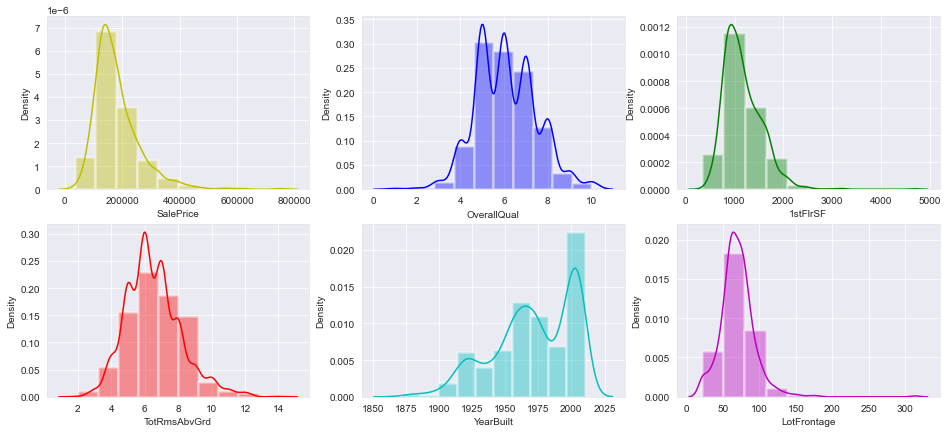

In [12]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(2,3,figsize = (16,7))

vis1 = sns.distplot(all_data_df["SalePrice"],bins=10,color='y', hist_kws=dict(edgecolor="w", linewidth=2.5),ax= ax[0][0])
vis2 = sns.distplot(all_data_df["OverallQual"],bins=10,color='b', hist_kws=dict(edgecolor="w",linewidth=2.5),ax=ax[0][1])
vis3 = sns.distplot(all_data_df["1stFlrSF"],bins=10,color='g', hist_kws=dict(edgecolor="w", linewidth=2.5),ax=ax[0][2])
vis4 = sns.distplot(all_data_df["TotRmsAbvGrd"],bins=10,color='r', hist_kws=dict(edgecolor="w", linewidth=2.5), ax=ax[1][0])
vis5 = sns.distplot(all_data_df["YearBuilt"],bins=10,color='c', hist_kws=dict(edgecolor="w", linewidth=2.5),ax=ax[1][1])
vis6 = sns.distplot(all_data_df["LotFrontage"],bins=10,color='m', hist_kws=dict(edgecolor="w", linewidth=2.5),ax=ax[1][2])

#La funcion/modulo displot saca una alerta

### Para cada variable independiente x:

In [13]:
def calcularb0b1(y, x):
    sumy = np.nansum(y)
    sumx = np.nansum(x)
    multxy = x * y
    multxx = x * x
    sumxy = np.nansum(multxy)
    sumxx = np.nansum(multxx)
    b0 = (x.shape[0] * (sumxy) - (sumx) * (sumy)) / (x.shape[0]  * sumxx - (sumx*sumx) )
    b1 = (sumy - (b0) * sumx) / x.shape[0]
    return b0, b1

def correlacion( y, x):
    xmean = np.nanmean(x)   
    print(xmean)
    ymean = np.nanmean(y)    
    x_values = x - xmean
    y_values = y - ymean    
    #return x_values
    xx_values = x_values * x_values    
    yy_values = y_values * y_values    
    xy_values = x_values * y_values    
    sum_xx_value = np.nansum(xx_values)
    sum_yy_value = np.nansum(yy_values)
    sum_xy_value = np.nansum(xy_values)
    r =  sum_xy_value / (math.sqrt(sum_xx_value) * math.sqrt(sum_yy_value))
    return r

#x_array = np.array([[100,90,80,45,50,50,60,40,25,20]])
#y_array = np.array([[3,5,9,10,20,21,24,24,27,35]])
#x_array = np.array([[1,2,3,4,5,6]])
#y_array = np.array([[10,17,30,28,39,47]])
#print(correlacion(y_array, x_array))

### Valores de B0 y B1

In [14]:
Y = all_data_df['SalePrice'].values.reshape(-1, 1)
X_Qual = all_data_df['OverallQual'].values.reshape(-1, 1)
X_size = all_data_df['1stFlrSF'].values.reshape(-1, 1)
X_rooms = all_data_df['TotRmsAbvGrd'].values.reshape(-1, 1)
X_year = all_data_df['YearBuilt'].values.reshape(-1, 1)
X_street = all_data_df['LotFrontage'].values.reshape(-1, 1)

b0_qual, b1_qual = calcularb0b1(Y, X_Qual)
b0_size, b1_size = calcularb0b1(Y, X_size)
b0_room, b1_room = calcularb0b1(Y, X_rooms)
b0_year, b1_year = calcularb0b1(Y, X_year)
b0_street, b1_street = calcularb0b1(Y, X_street)

print("Resultados B0 y B1")
print("-> Resultados para variable Y = SalePrice y X = OverallQual  b0 = {}    b1 = {}  ".format(b0_qual, b1_qual))
print("-> Resultados para variable Y = SalePrice y X = 1stFlrSF     b0 = {}    b1 = {}  ".format(b0_size, b1_size))
print("-> Resultados para variable Y = SalePrice y X = TotRmsAbvGrd b0 = {}    b1 = {}  ".format(b0_room, b1_room))
print("-> Resultados para variable Y = SalePrice y X = YearBuilt    b0 = {}    b1 = {}  ".format(b0_year, b1_year))
print("-> Resultados para variable Y = SalePrice y X = LotFrontage  b0 = {}    b1 = {}  ".format(b0_street, b1_street))

Resultados B0 y B1
-> Resultados para variable Y = SalePrice y X = OverallQual  b0 = 45435.80259309938    b1 = -96206.07951476026  
-> Resultados para variable Y = SalePrice y X = 1stFlrSF     b0 = 124.50062222065822    b1 = 36173.44679512124  
-> Resultados para variable Y = SalePrice y X = TotRmsAbvGrd b0 = 26086.18084719235    b1 = 10896.471957614793  
-> Resultados para variable Y = SalePrice y X = YearBuilt    b0 = 1375.3734679368924    b1 = -2530308.2457323573  
-> Resultados para variable Y = SalePrice y X = LotFrontage  b0 = 480.40920504632976    b1 = 153238.438068118  


### Calcular el coeficiente de correlacion entre x y y.

In [15]:
r_qual = correlacion(Y, X_Qual)
r_size = correlacion(Y, X_size)
r_rooms = correlacion(Y, X_rooms)
r_year = correlacion(Y, X_year)
r_street = correlacion(Y, X_street)

6.0993150684931505
1162.626712328767
6.517808219178082
1971.267808219178
70.04995836802665


### Graficar x vs y(scatterplot) usando matplotlib.

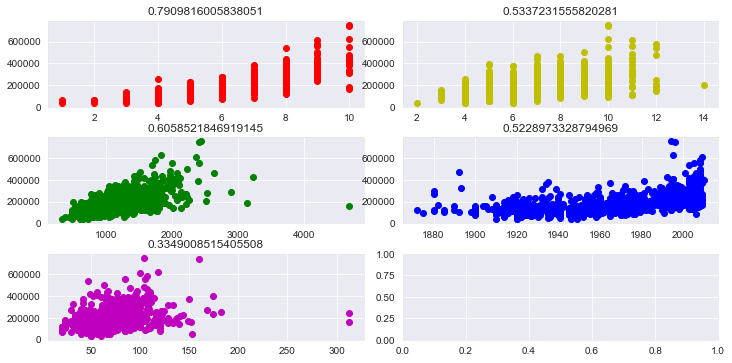

In [87]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=3, ncols=2)
plt.tight_layout()

ax [0, 0].scatter(X_Qual, Y, color='r')
ax [0, 0].set_title(r_qual)

ax [1, 0].scatter(X_size, Y, color='g')
ax [1, 0].set_title(r_size)

ax [0, 1].scatter(X_rooms, Y, color='y')
ax [0, 1].set_title(r_rooms)

ax [1, 1].scatter(X_year, Y, color = 'b')
ax [1, 1].set_title(r_year)

ax [2, 0].scatter(X_street, Y, color = 'm')
ax [2, 0].set_title(r_street)

plt.show()


### Funcion de entrenamiento 

In [155]:
def fun_entrenamiento( y, x,  epochs, error_interval, escalar):
    # y es un vector 
    # y es un vector 
    matrix = np.array(np.ones(( x.shape[0], 2 ), dtype=float)  )
    matrix[:,0] = x[:,0]    
    #print(calcularb0b1(y, x))
    #b0 = 37443.960929
    #b1 = 123.1325375
    b1 = np.mean(y) / np.mean(x)
    b0 = np.mean(y - b1 * x)
    vector_b0_b1 = np.array([b1, b0])
    vect_error = np.empty( shape=(0, 0) )
    modelo = dict()
    #print(y[:,0])
    for i in range(0, epochs):    
        modelo[i] = vector_b0_b1
        y_prediccion = np.dot(matrix, vector_b0_b1)        
        error = (1 / (2 * y_prediccion.shape[0]))  * np.sum(np.power((y_prediccion - y[:,0]) , 2))
        vect_error = np.insert(vect_error, i, error)
        sumatoria_gardiente = np.array(np.ones((  y.shape[0], 2 ), dtype=float)  )
        sumatoria_gardiente[:,0] = (y_prediccion - y[:,0])
        sumatoria_gardiente[:,1] = y_prediccion - y[:,0]
        sumatoria_gardiente = sumatoria_gardiente * matrix  
        gradiente = np.array([np.mean(sumatoria_gardiente[:,0]) ,   np.mean(sumatoria_gardiente[:,1])])
       
        b0 = b0 - (escalar * gradiente[1])
        b1 = b1 - (escalar * gradiente[0])
        vector_b0_b1 = np.array([b1, b0]) 
        
        if i % error_interval == 0:
            print(error)
        
    return vect_error, modelo

def funcion_graficar_error(vect_error):
    x_grafica = np.arange(0, len(vect_error), 1)
    #print(y_grafica)
    plt.plot(x_grafica, vect_error, color='r')
    plt.title("Grafica No Errores Modelo")
    plt.xlabel("Numero de iteracion")
    plt.ylabel("Error para cada iteracion")
    plt.show()
    
def funcion_gra_modelo_tiempo(model_dic, n, x, y):
    for i in range(0, len(model_dic)):
        if i % n == 0:
            

### Llamar el entrenamiento

1450458434.0034034
1400596694.9974658
1368619714.7177796
1342330212.5592418
1320716604.341745
1302947227.9053888
1288338341.8850846
1276327816.2755544
1266453502.4355607
1258335450.2386336
1251661288.1105163
1246174203.3971097
1241663060.5638752
1237954276.988488
1234905143.7383218
1232398334.3254008
1230337390.1431918
1228643008.8710105
1227249993.028902
1226104741.2675512
1225163185.8614824
1224389097.043097
1223752688.930641
1223229473.4081059
1222799317.8559322
1222445670.47527
1222154923.397343
1221915889.0712144
1221719369.7820964
1221557803.7358255


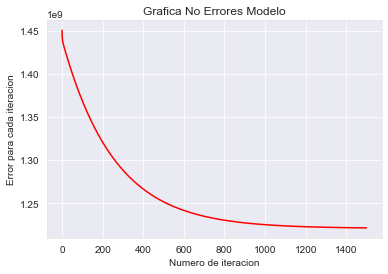

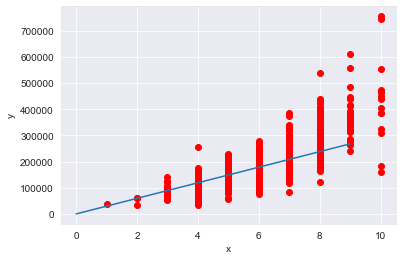

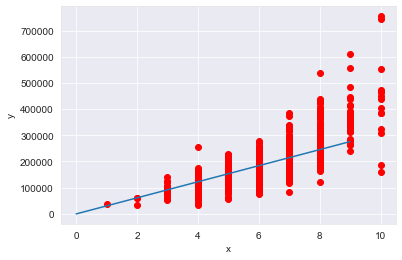

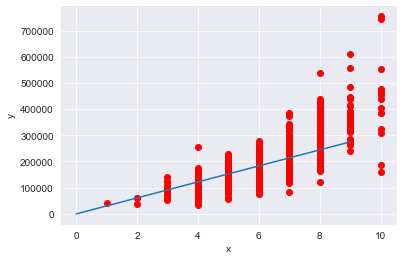

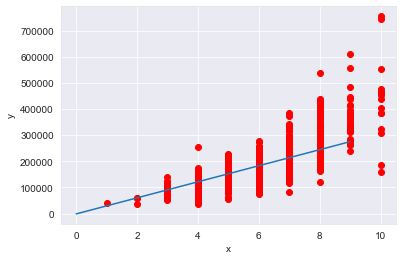

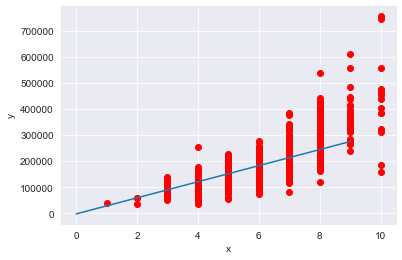

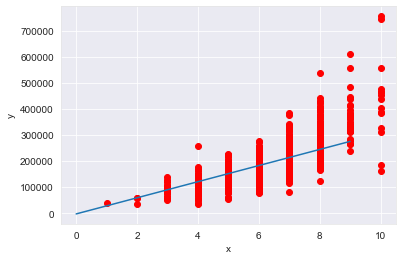

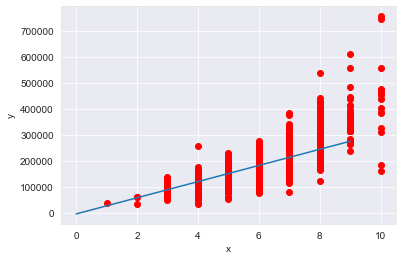

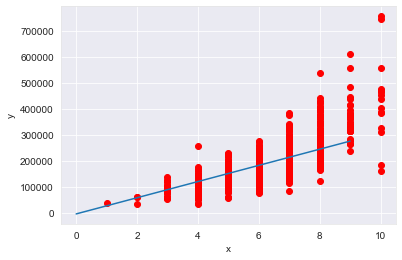

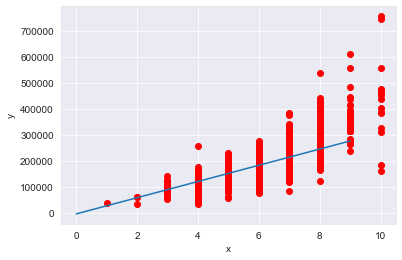

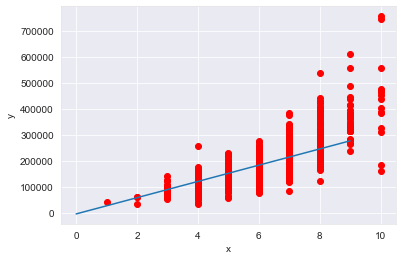

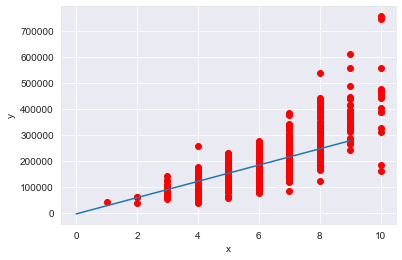

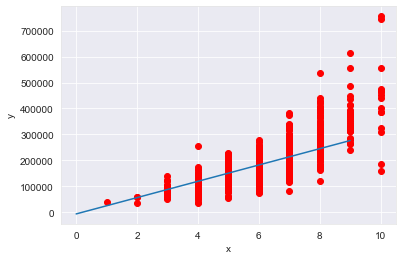

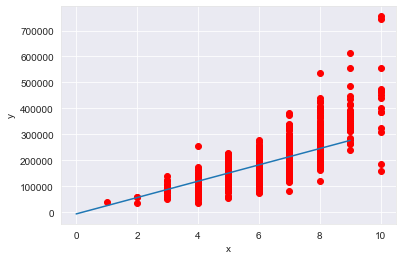

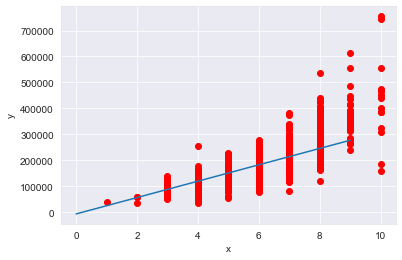

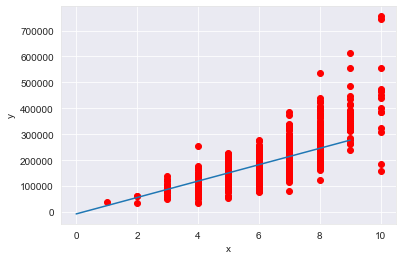

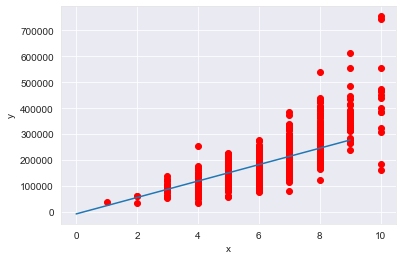

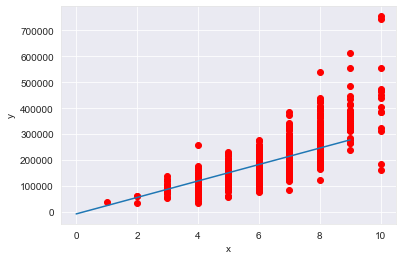

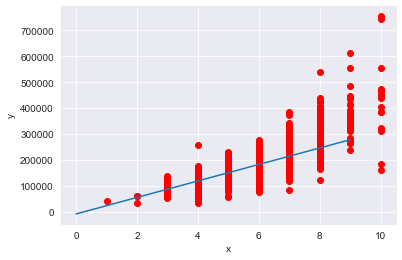

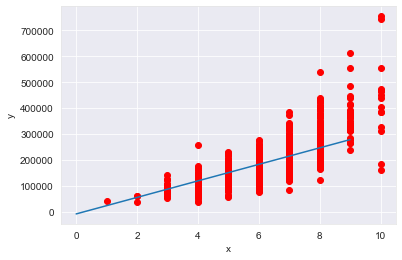

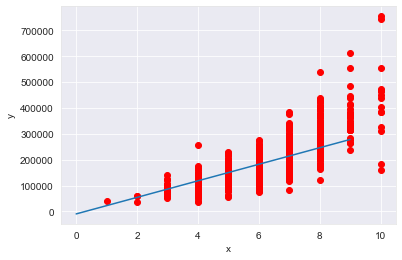

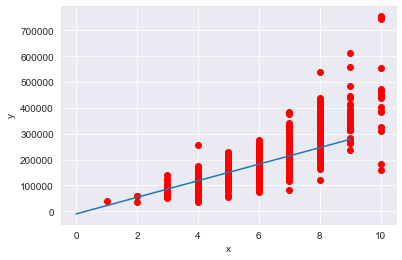

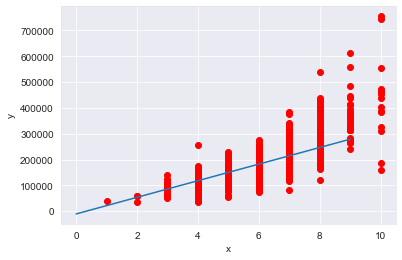

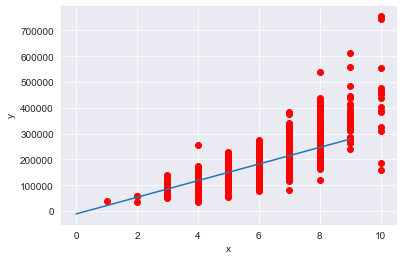

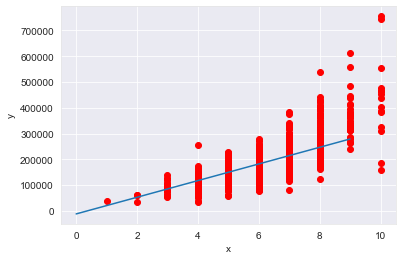

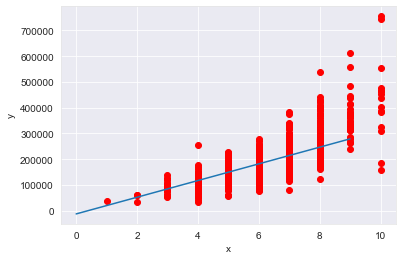

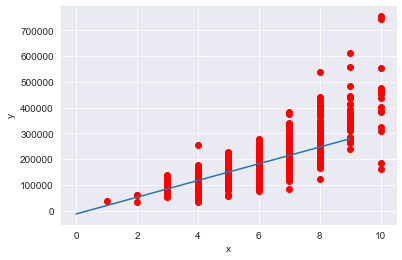

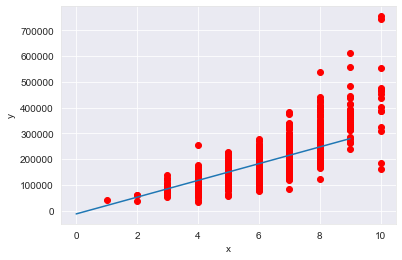

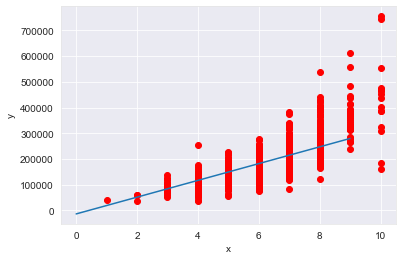

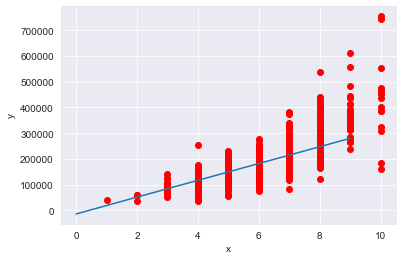

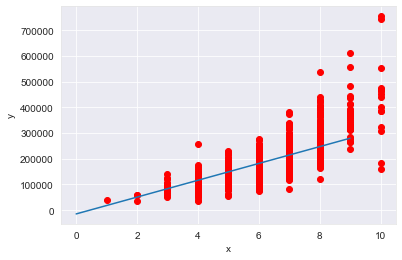

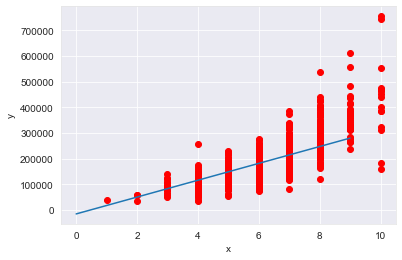

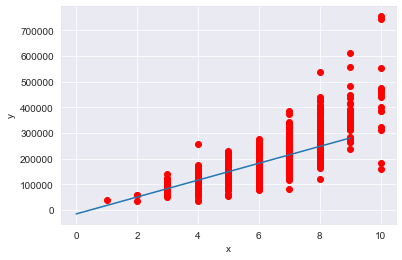

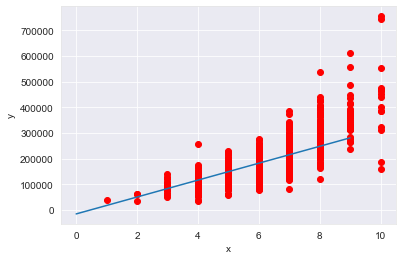

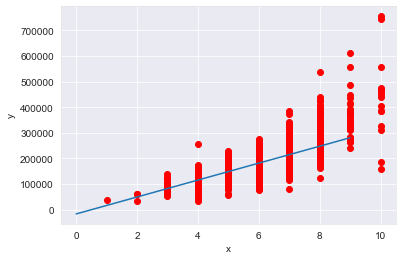

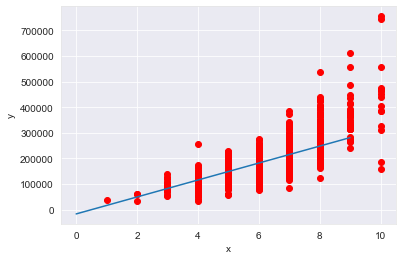

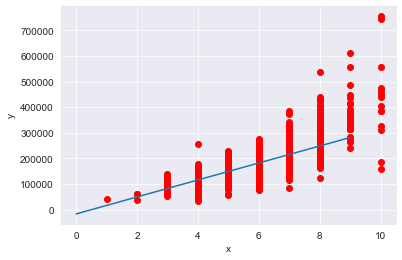

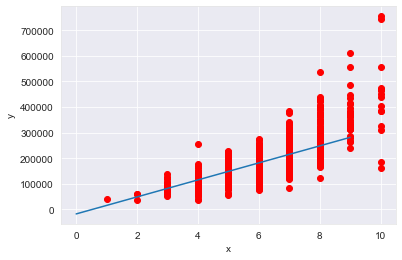

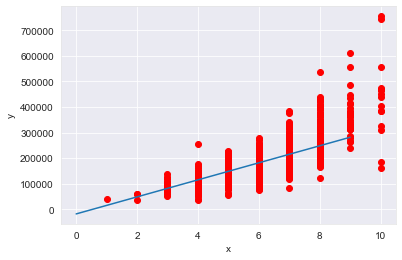

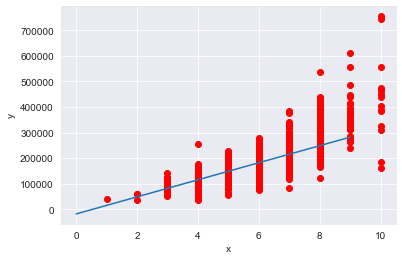

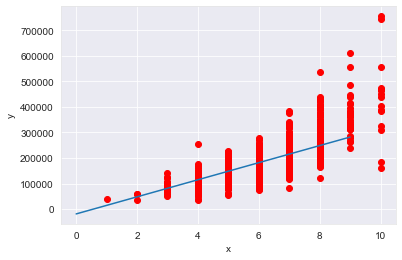

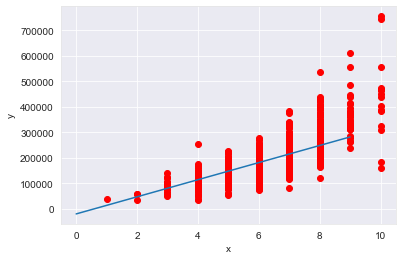

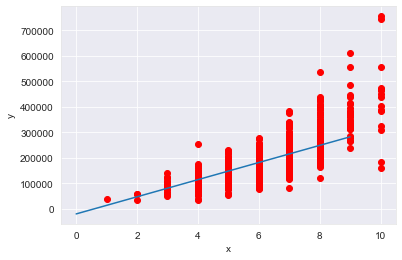

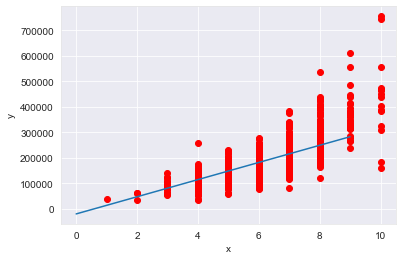

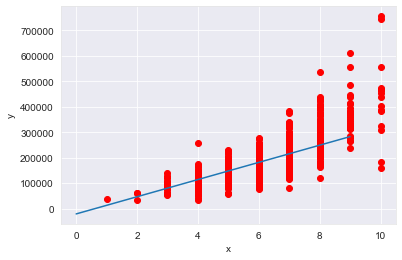

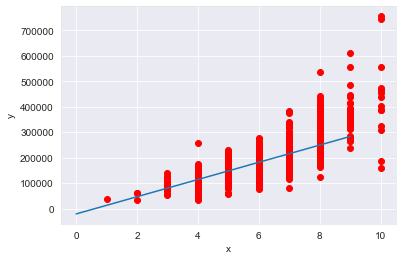

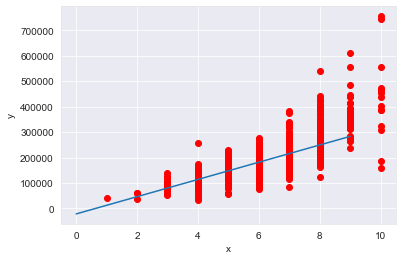

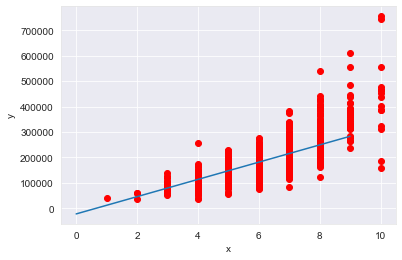

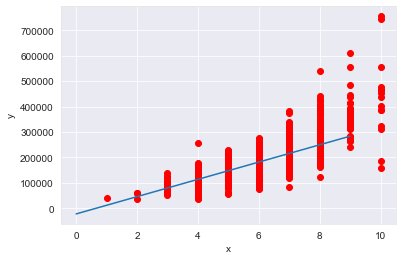

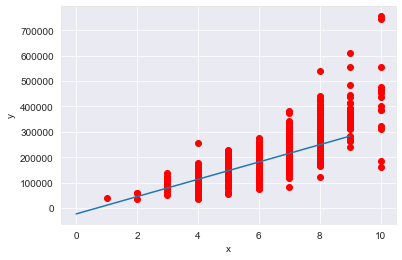

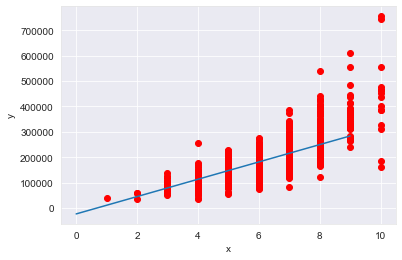

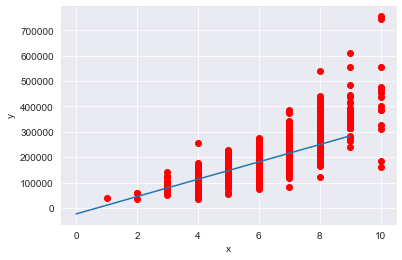

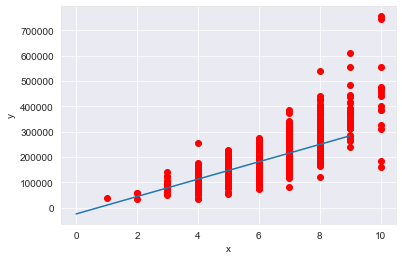

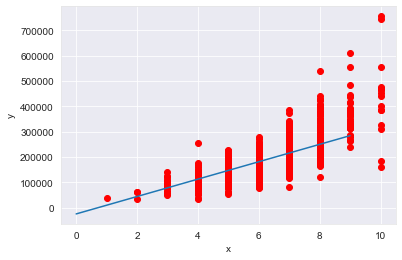

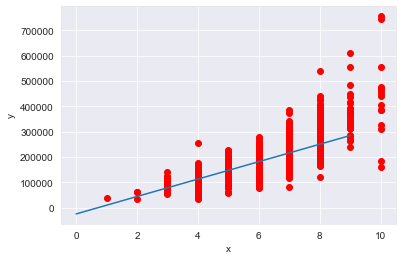

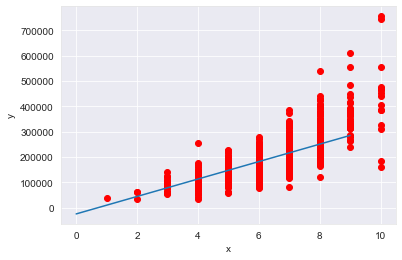

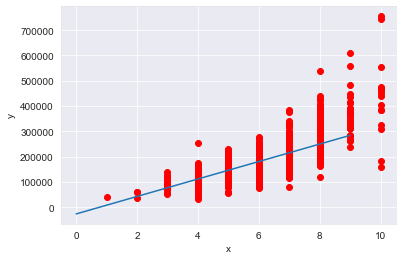

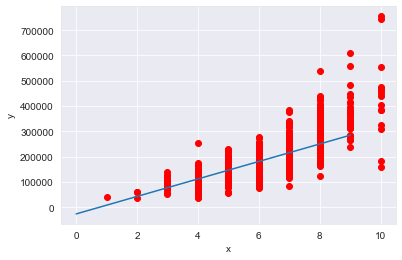

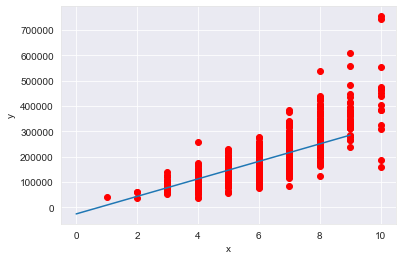

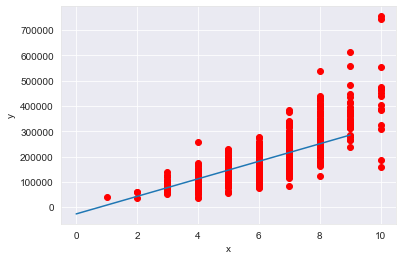

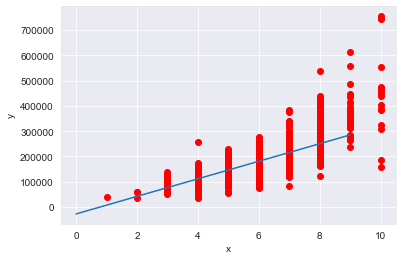

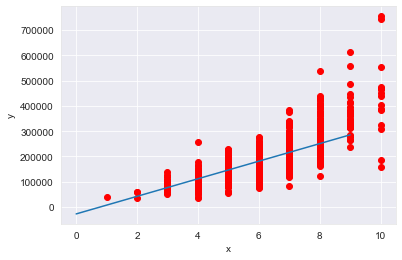

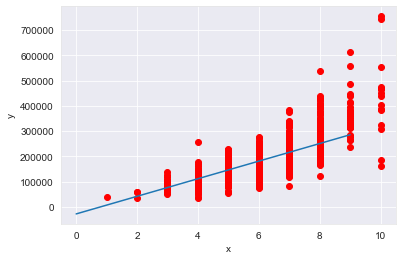

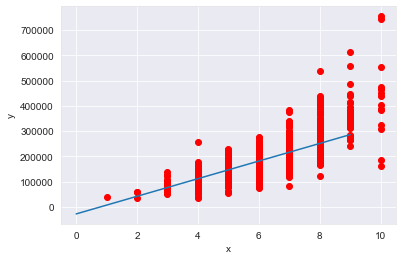

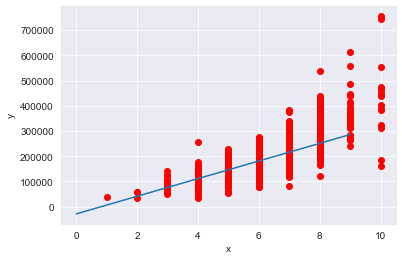

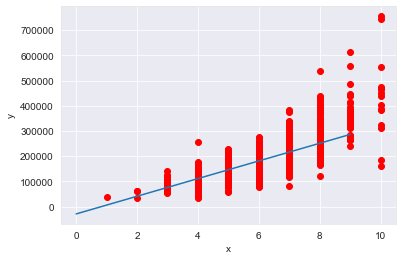

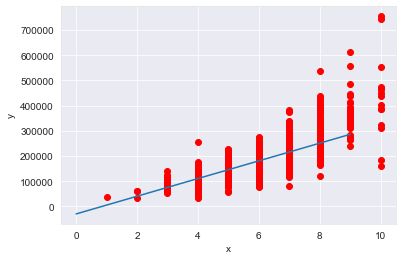

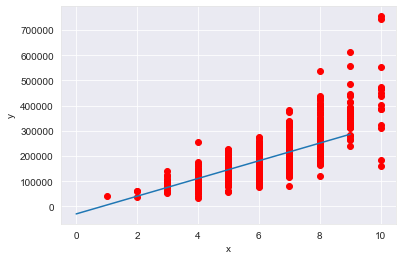

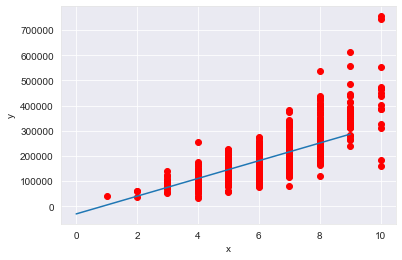

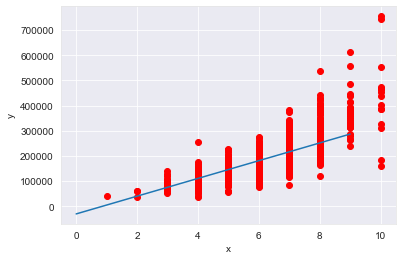

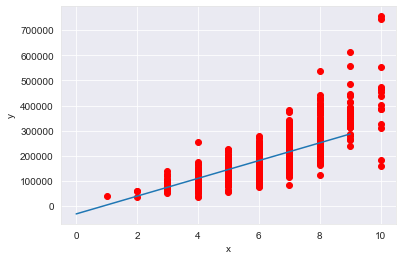

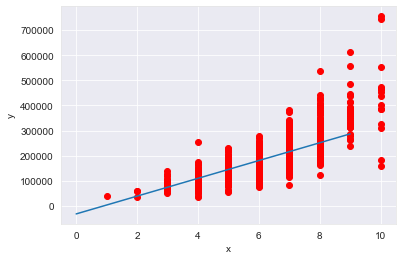

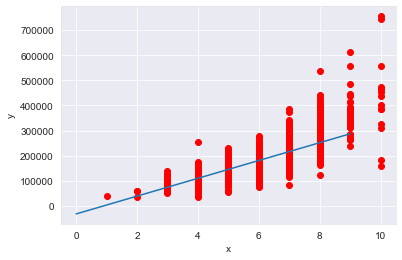

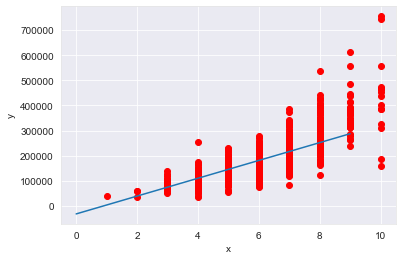

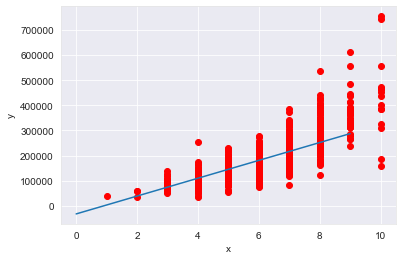

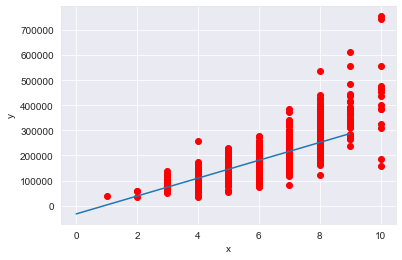

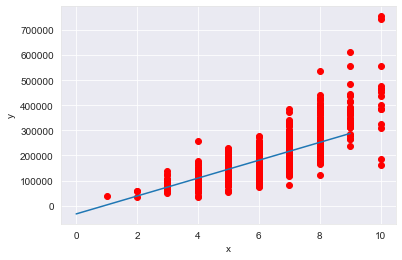

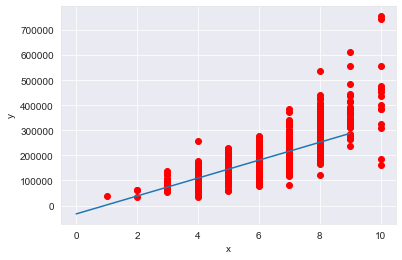

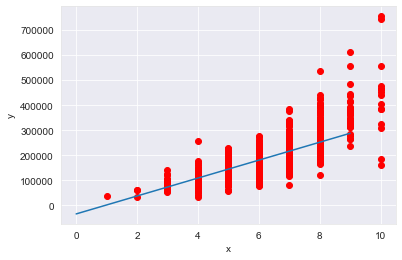

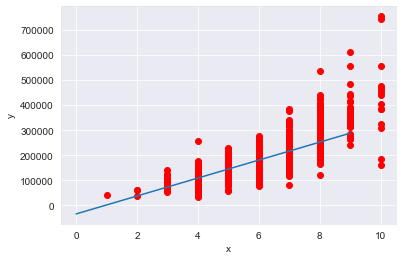

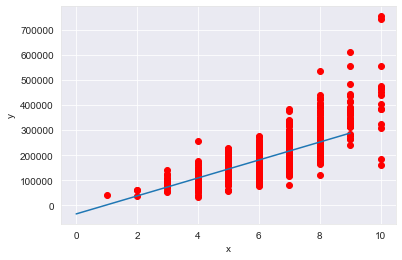

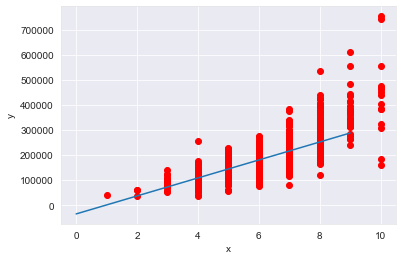

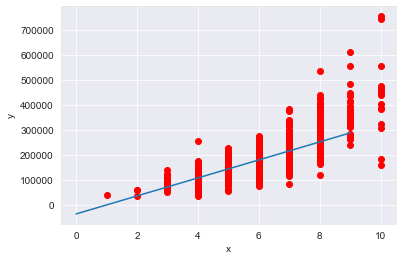

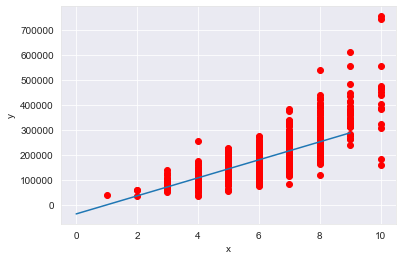

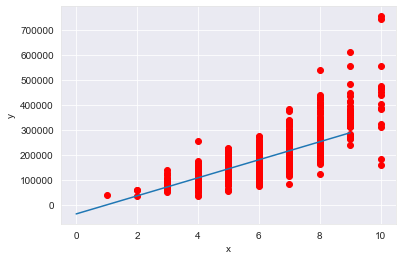

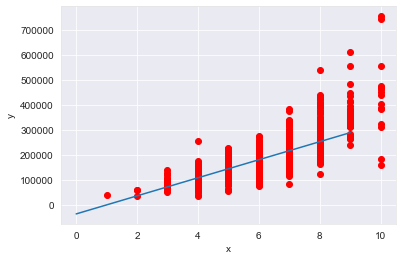

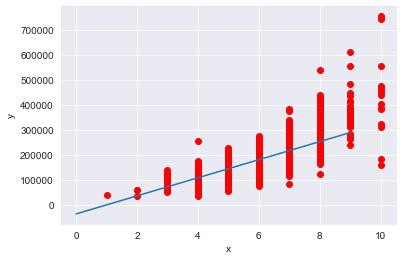

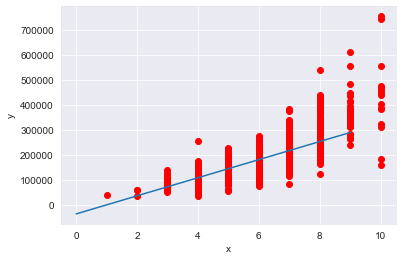

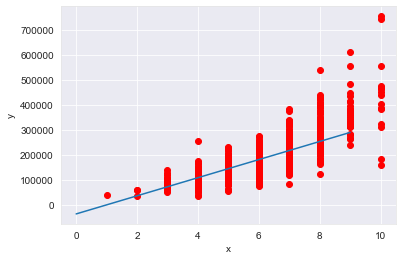

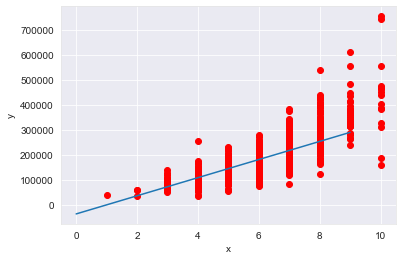

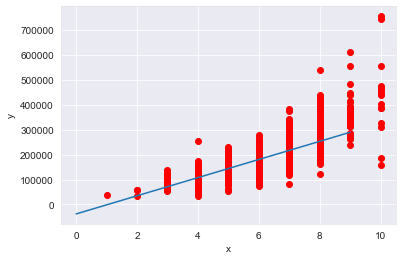

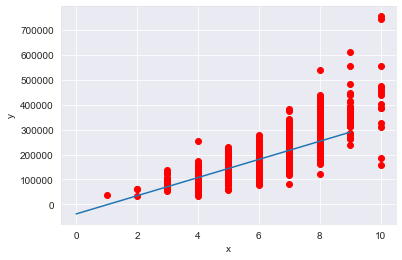

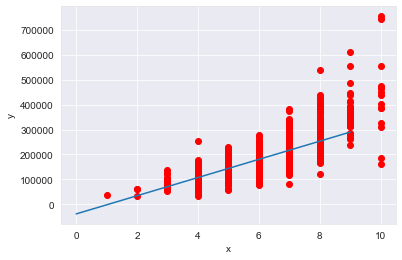

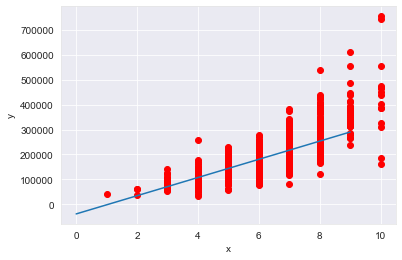

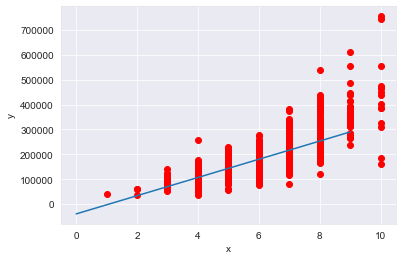

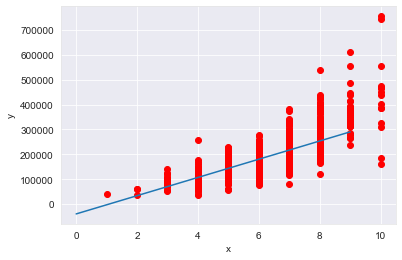

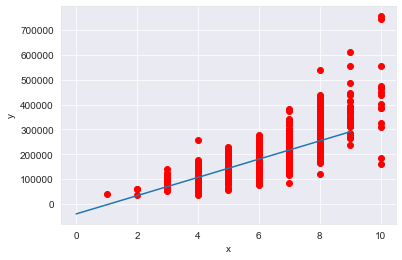

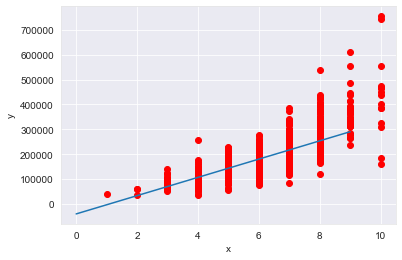

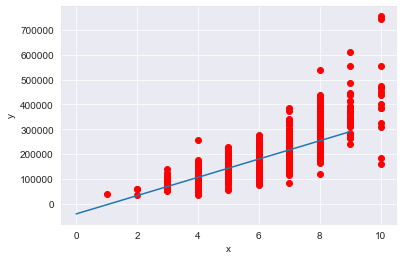

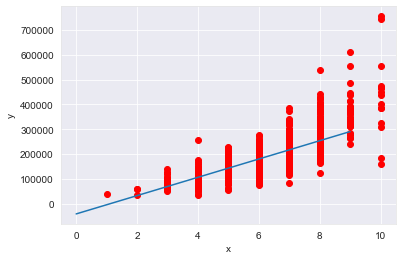

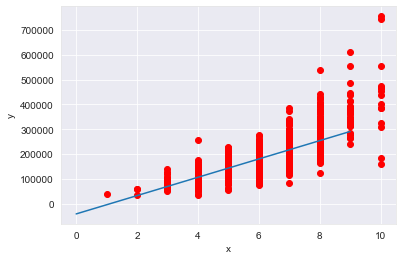

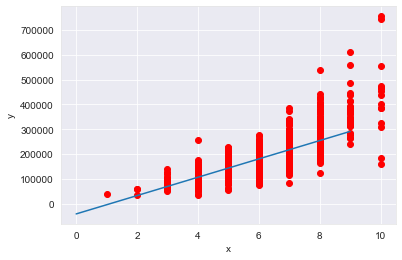

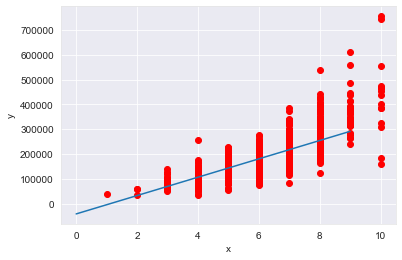

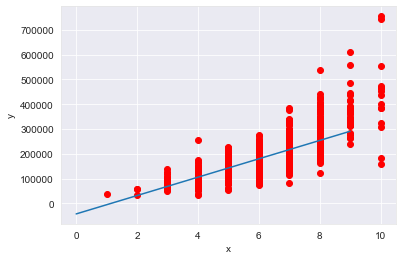

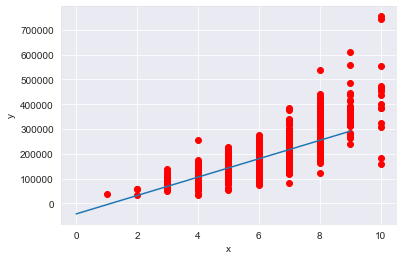

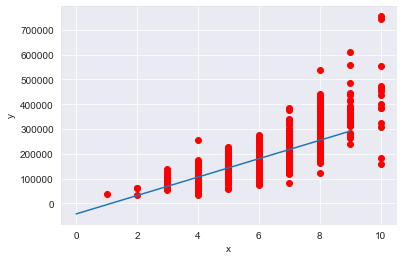

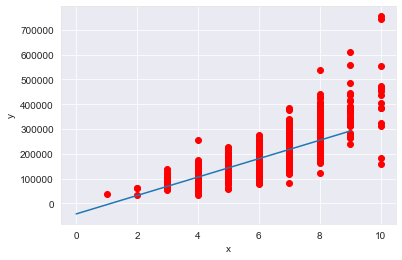

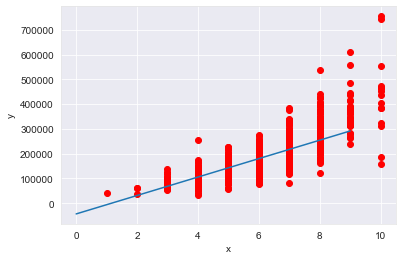

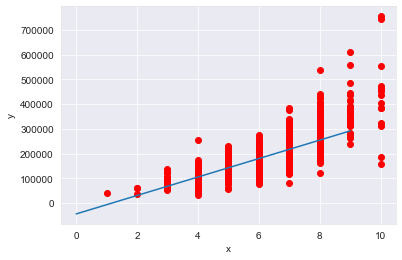

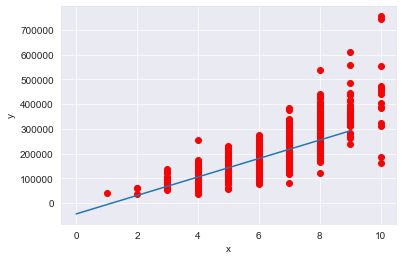

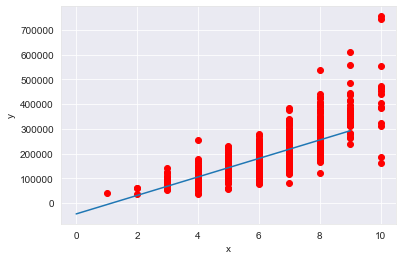

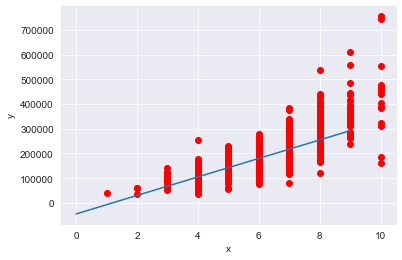

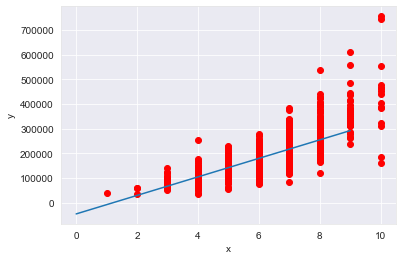

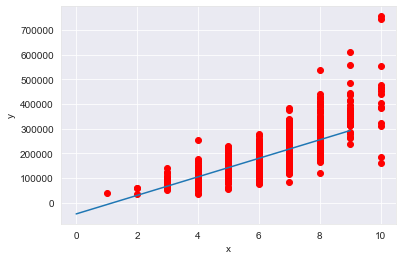

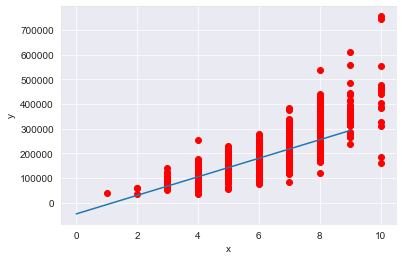

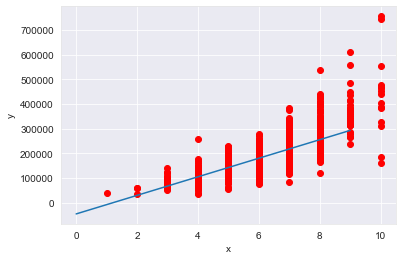

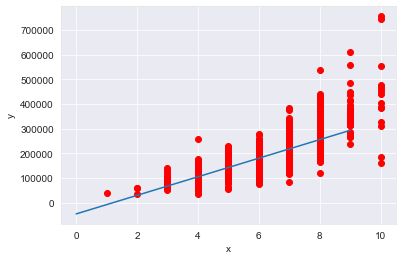

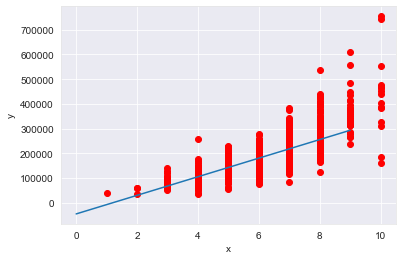

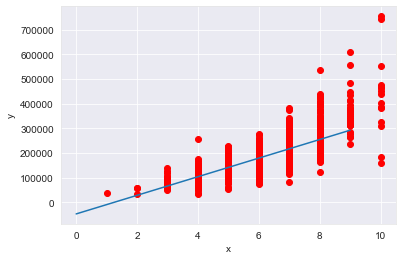

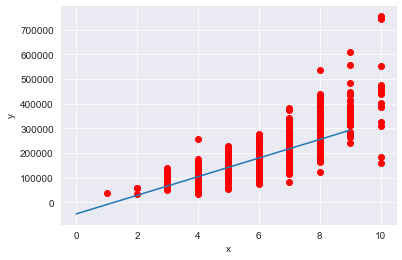

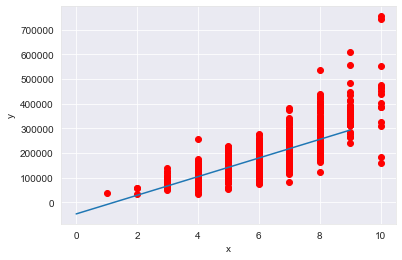

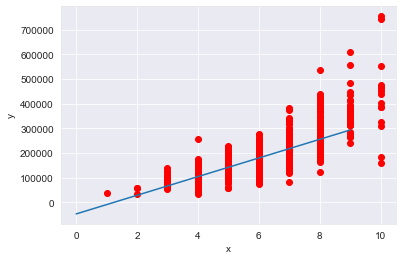

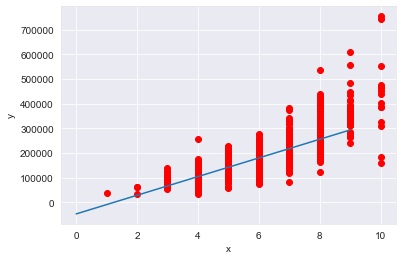

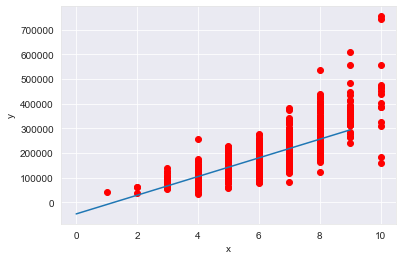

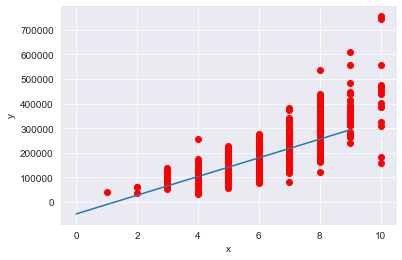

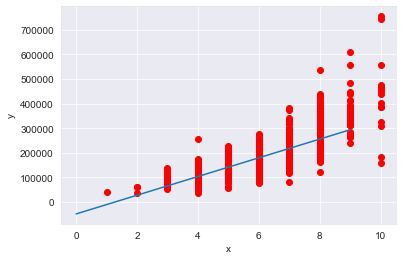

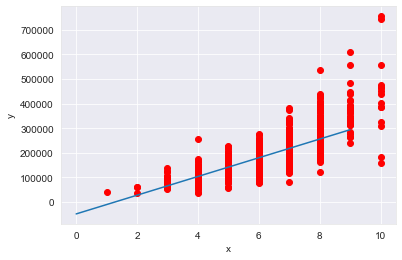

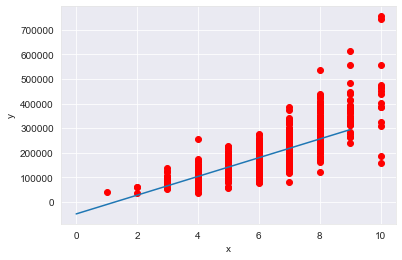

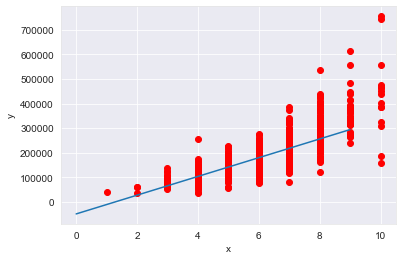

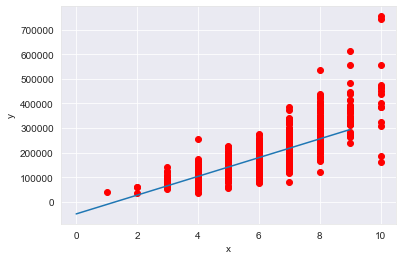

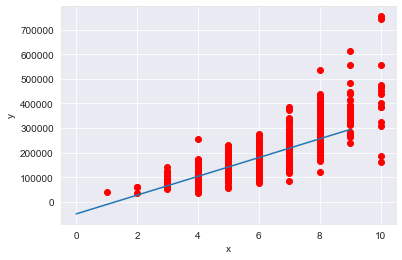

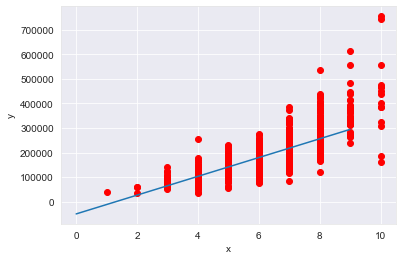

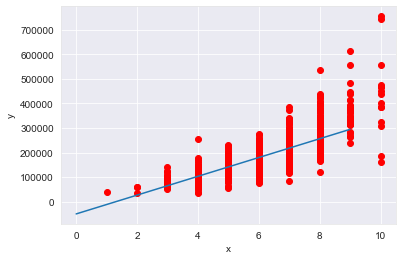

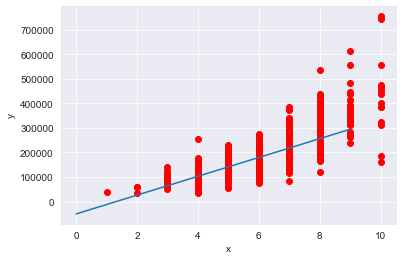

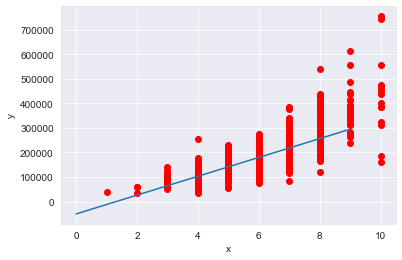

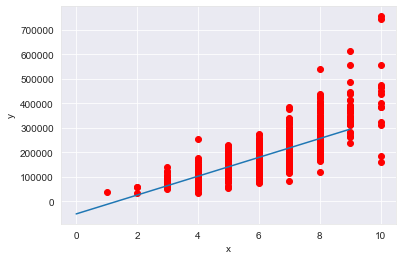

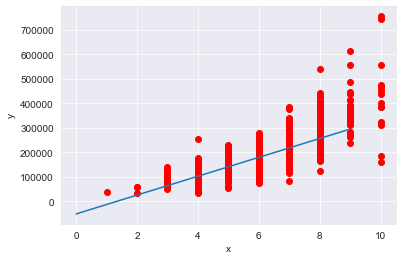

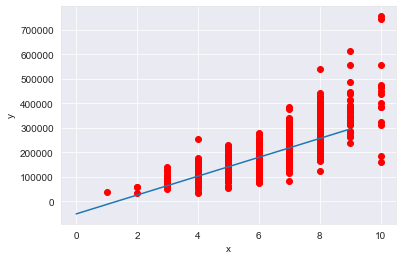

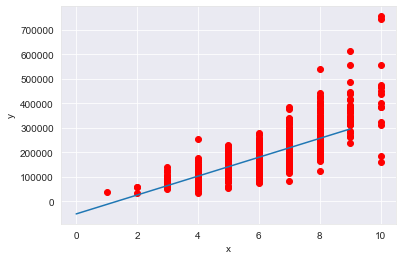

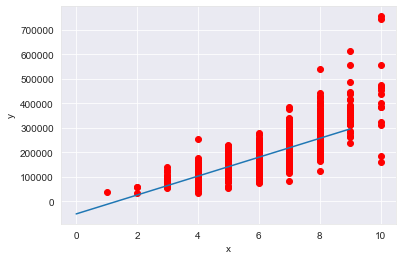

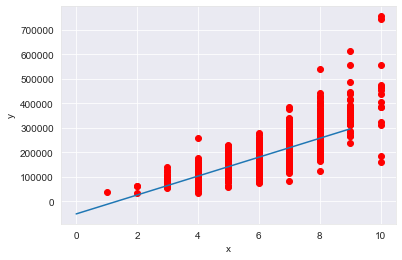

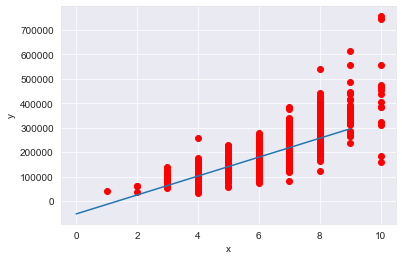

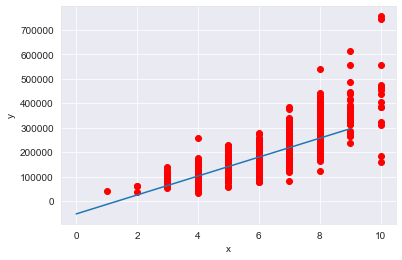

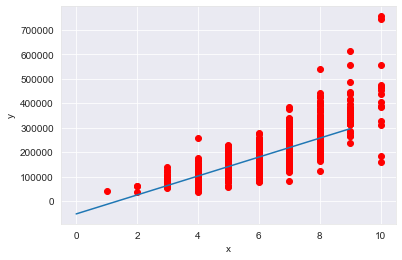

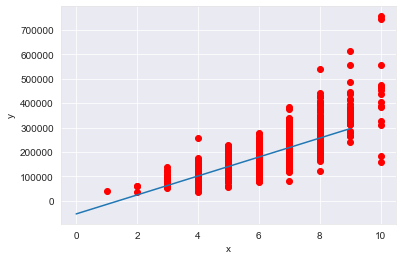

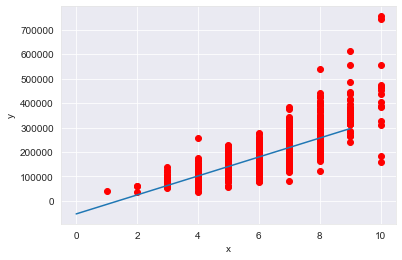

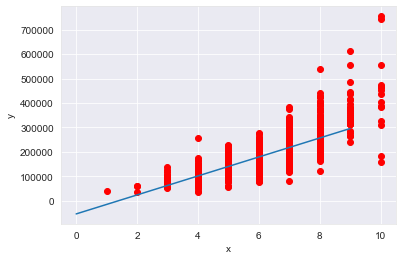

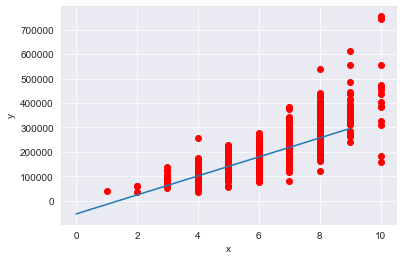

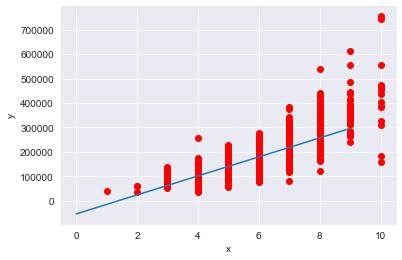

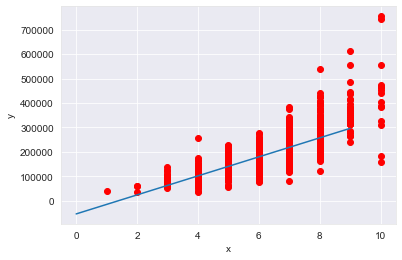

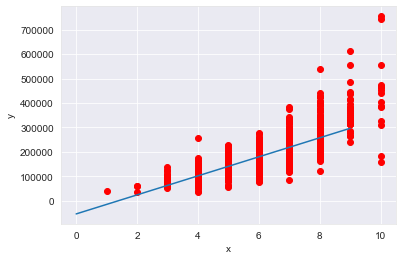

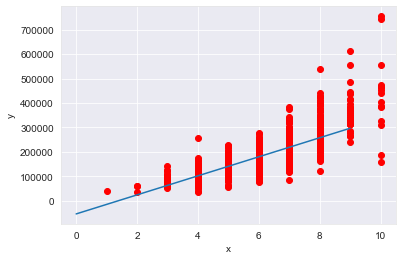

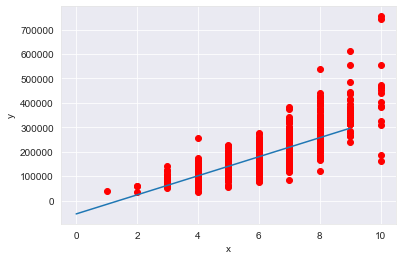

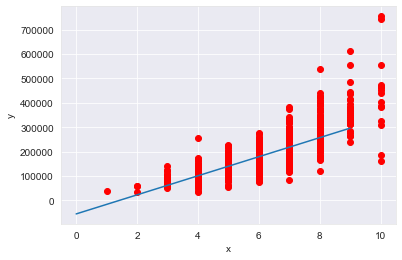

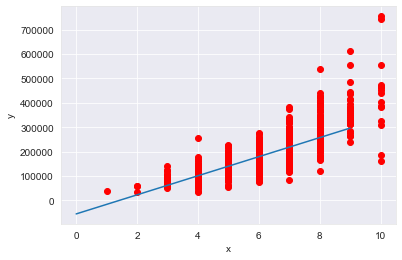

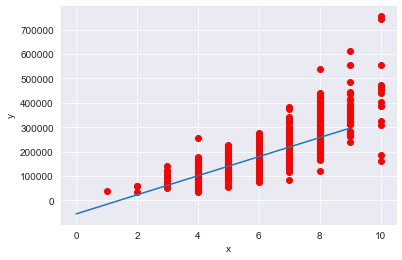

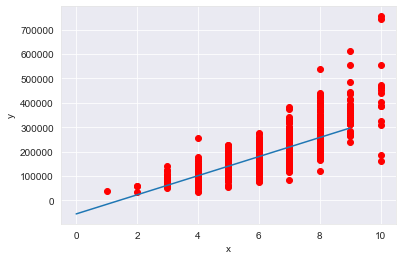

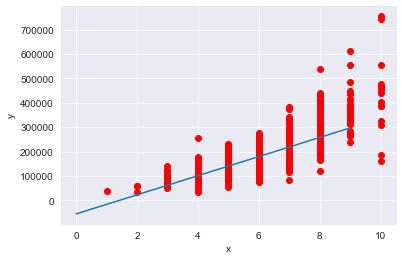

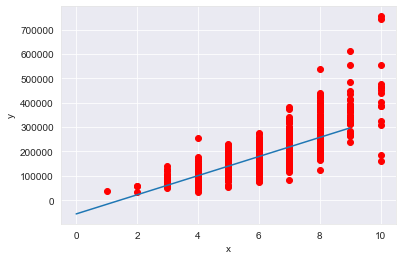

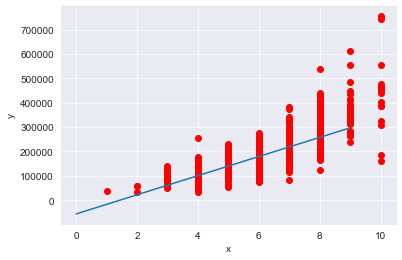

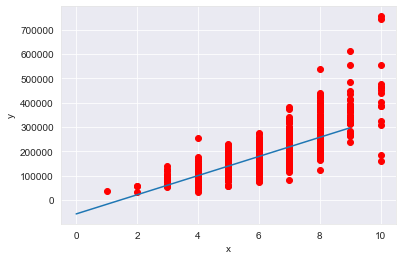

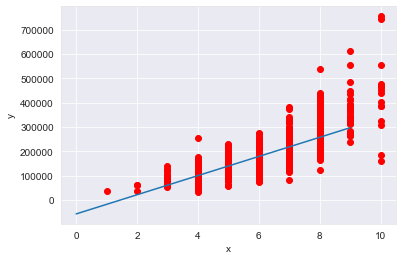

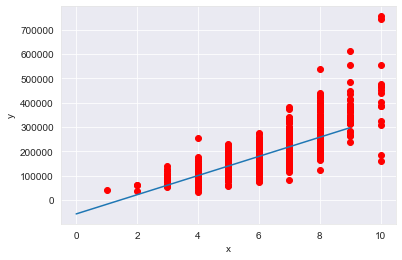

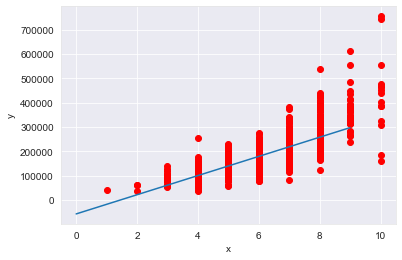

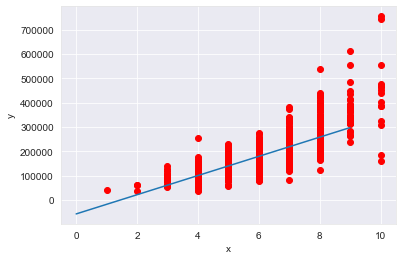

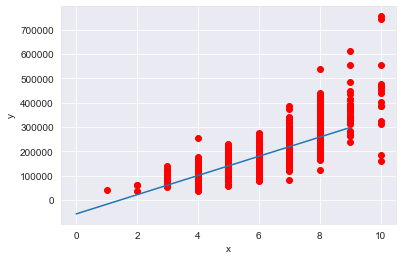

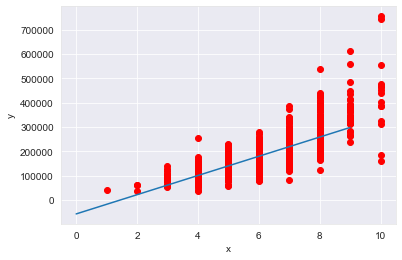

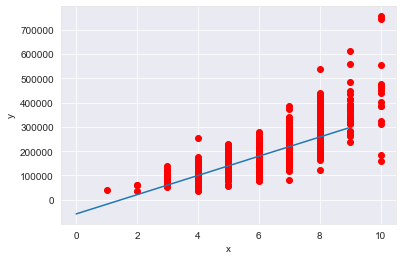

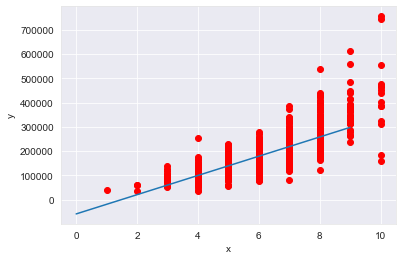

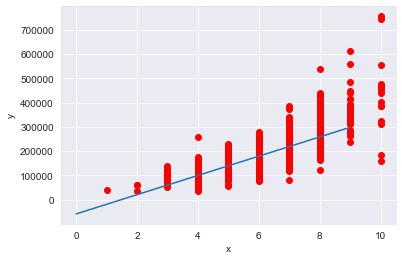

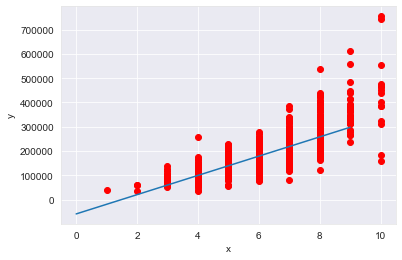

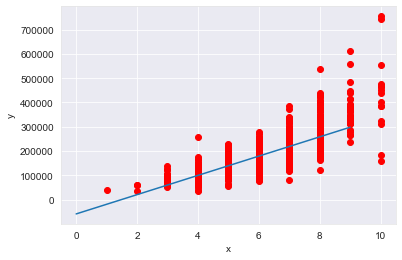

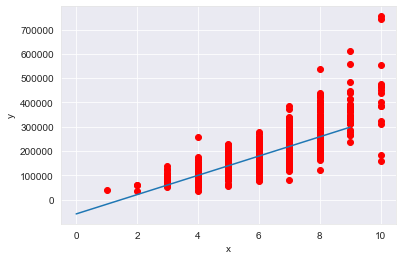

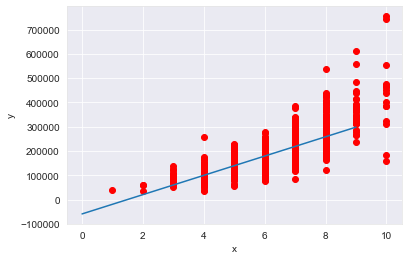

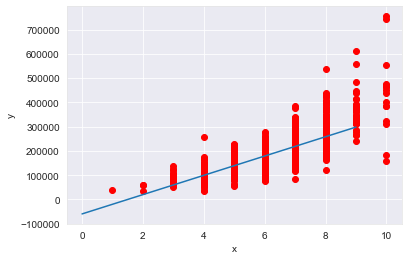

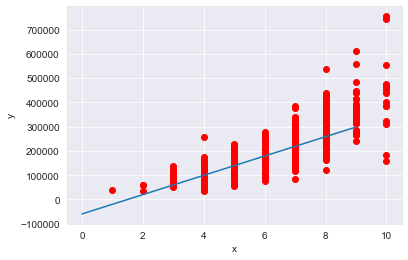

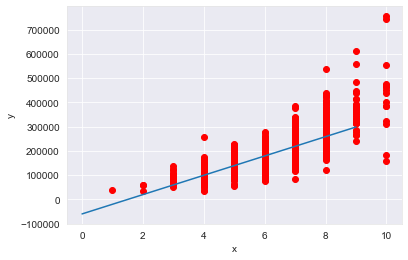

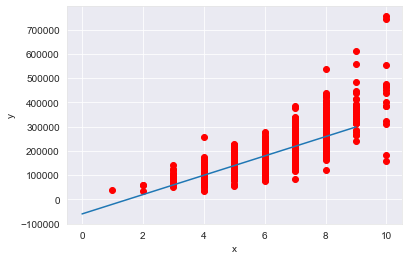

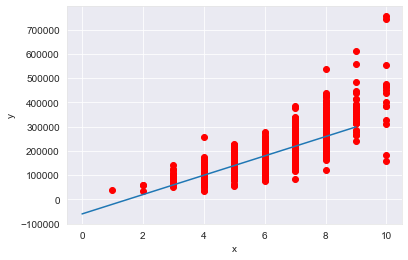

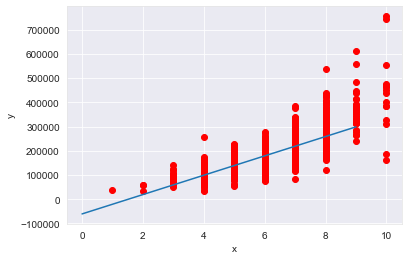

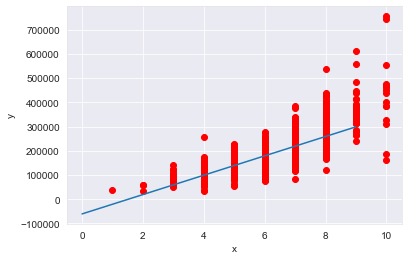

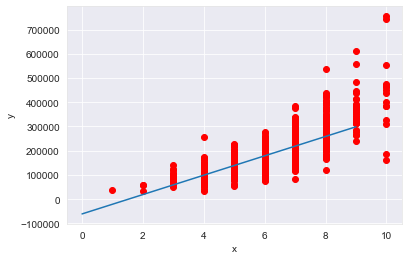

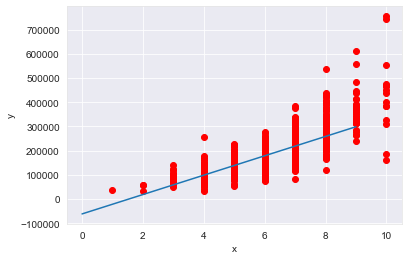

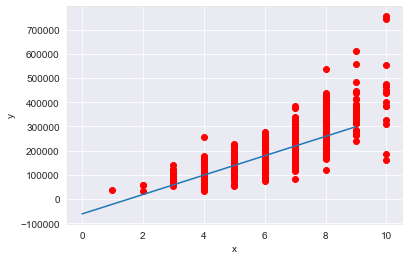

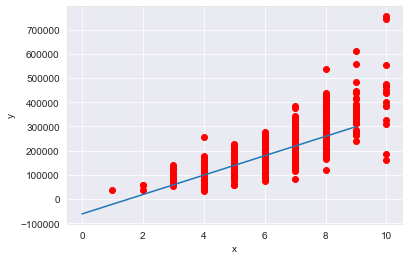

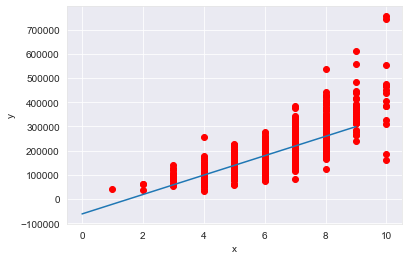

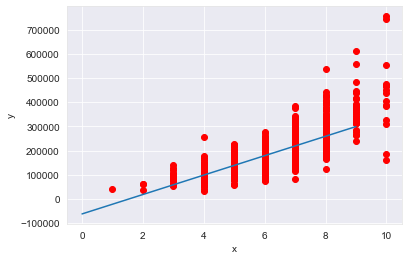

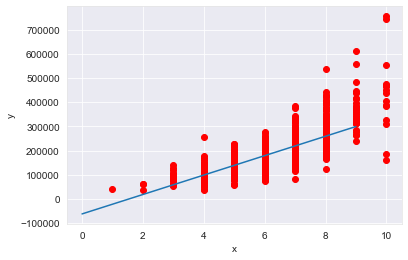

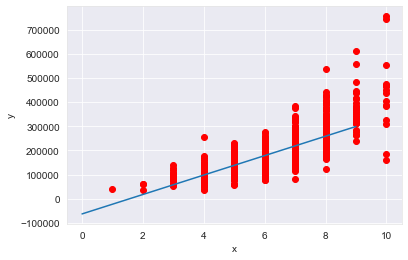

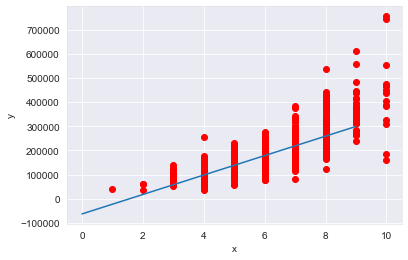

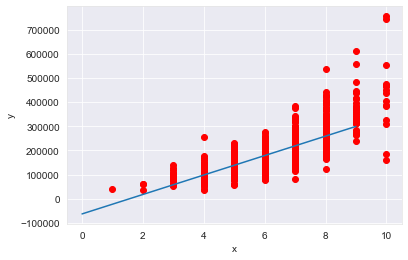

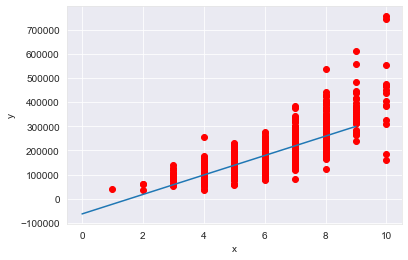

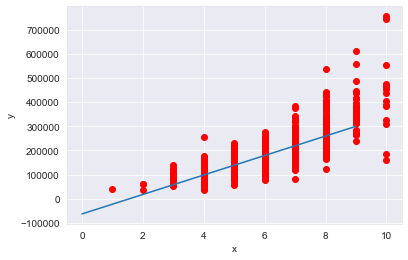

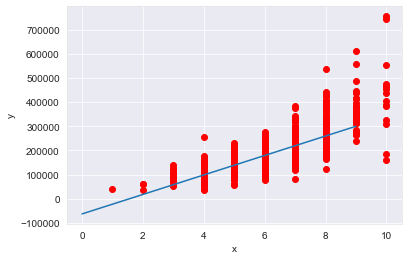

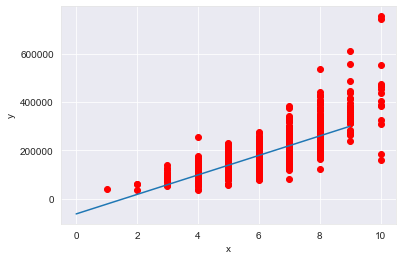

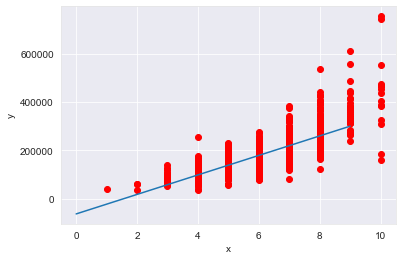

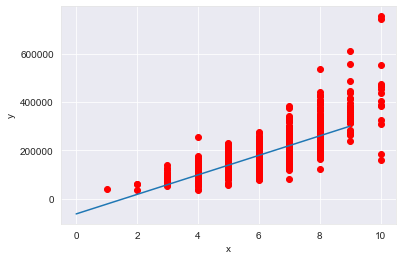

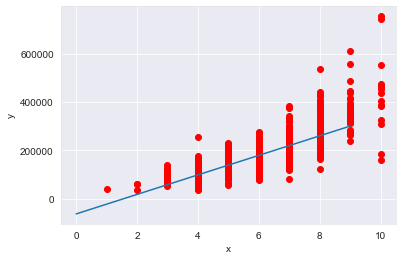

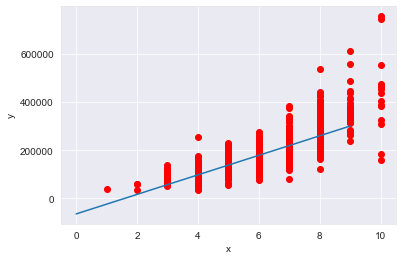

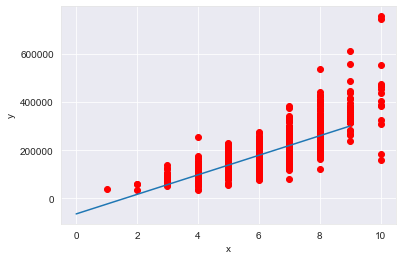

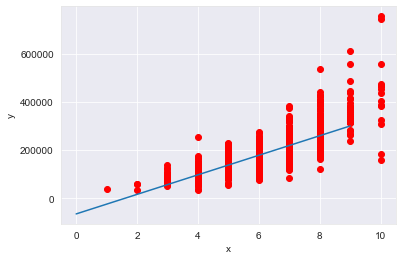

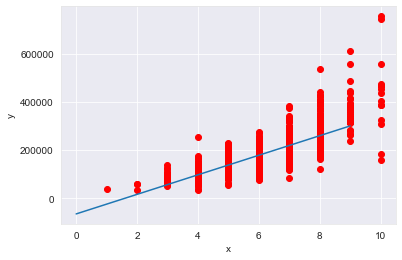

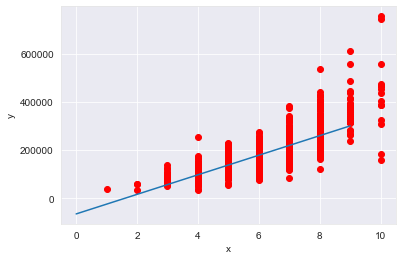

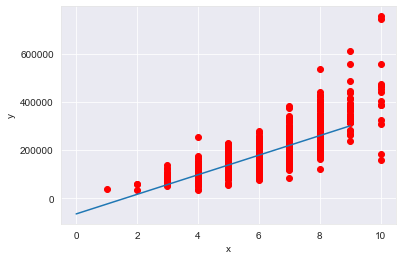

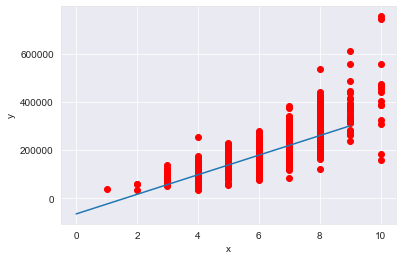

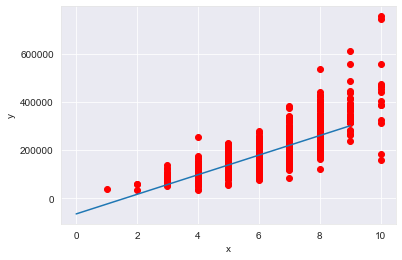

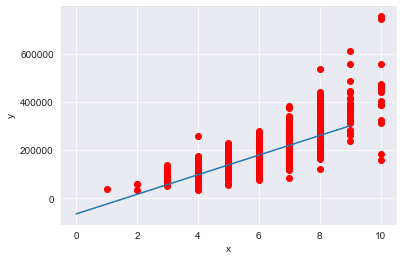

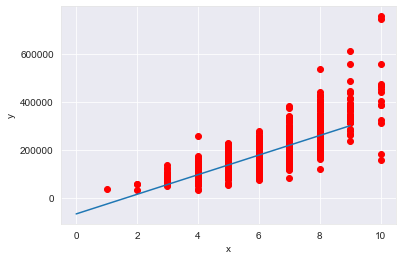

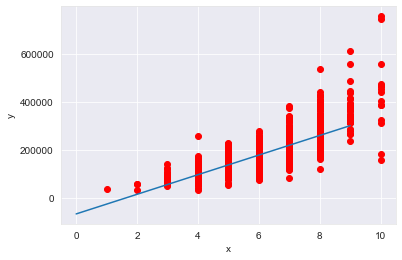

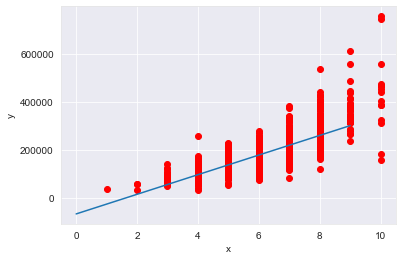

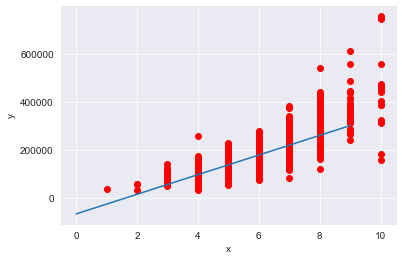

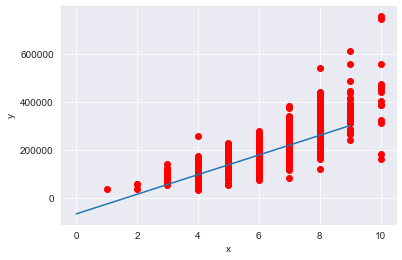

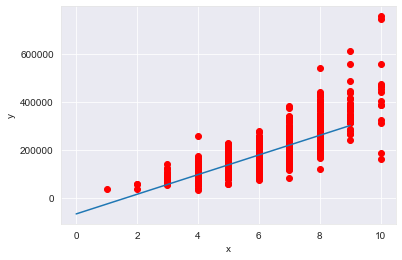

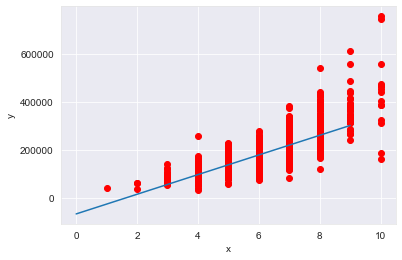

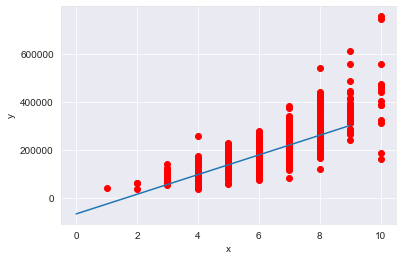

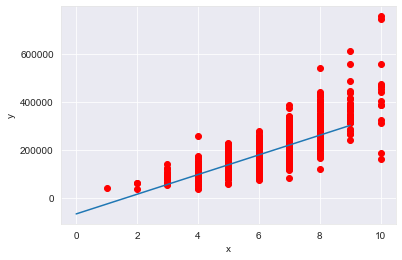

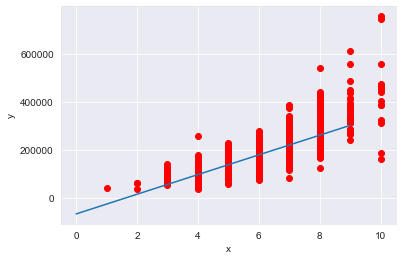

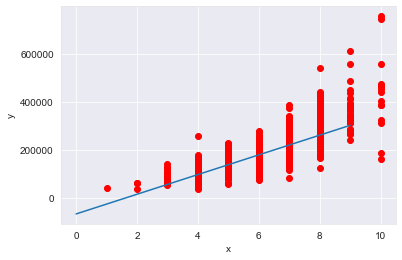

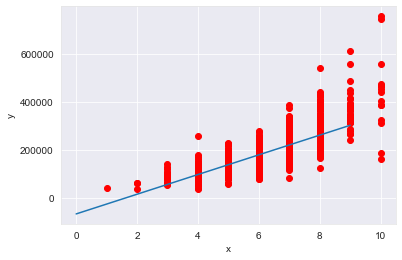

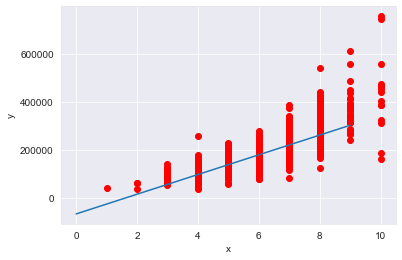

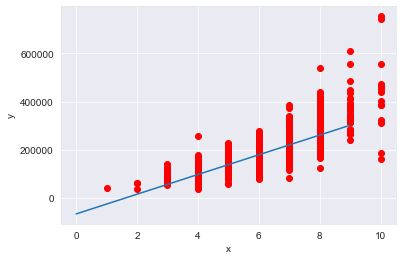

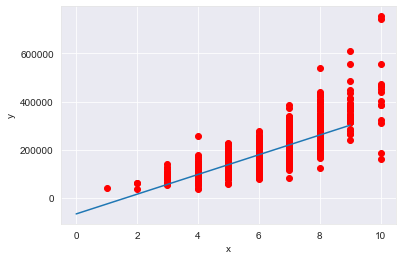

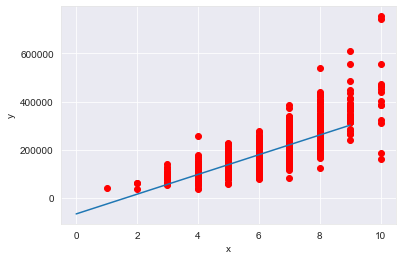

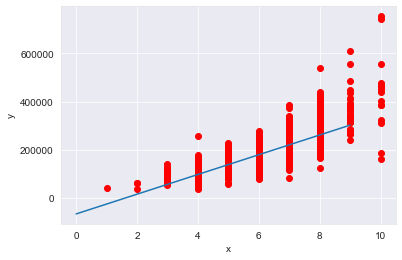

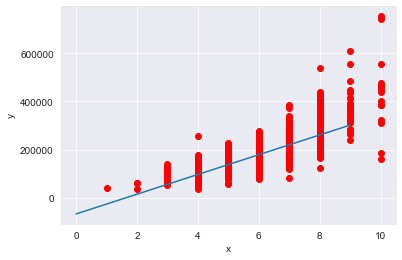

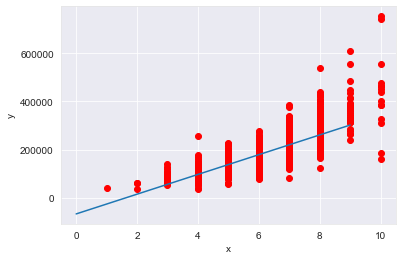

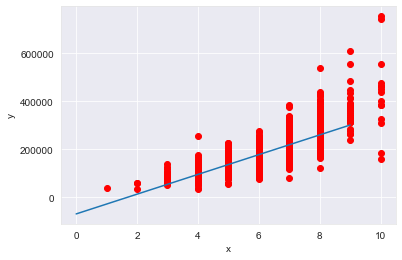

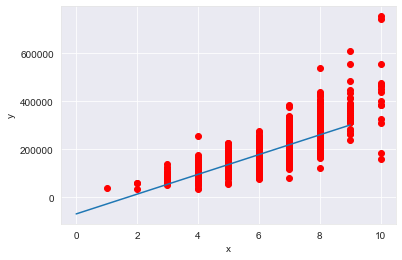

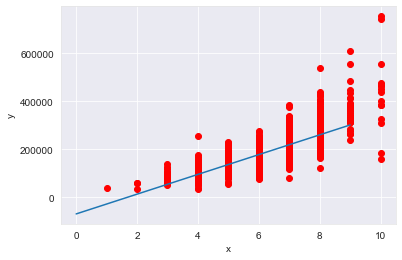

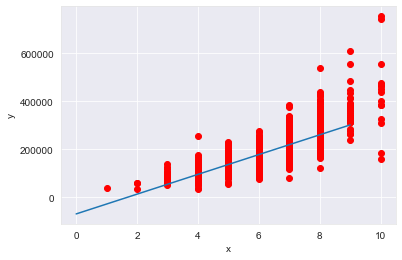

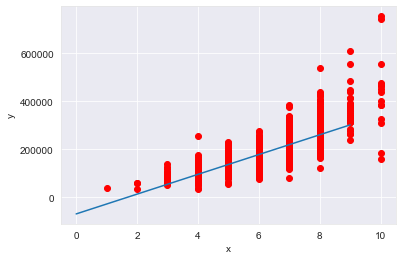

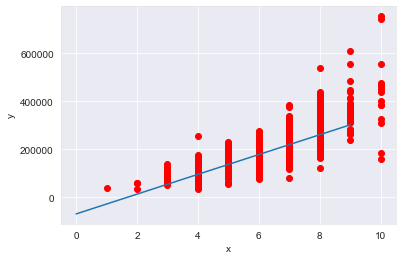

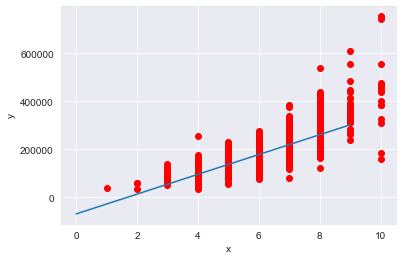

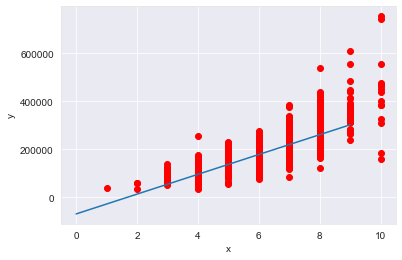

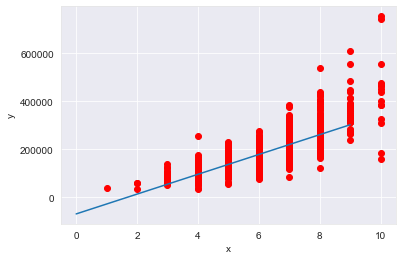

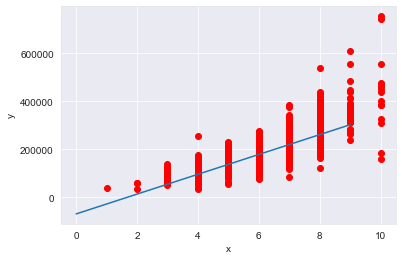

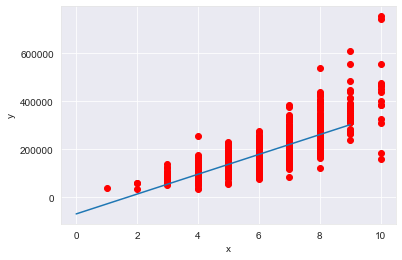

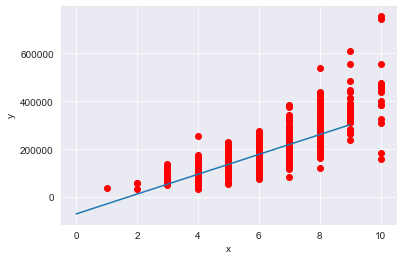

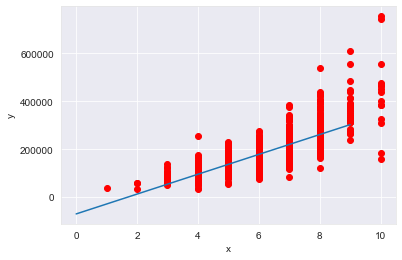

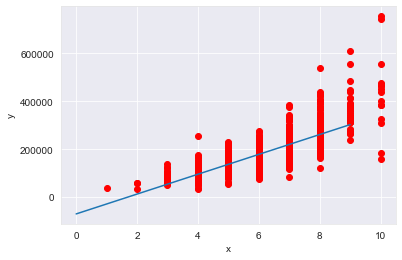

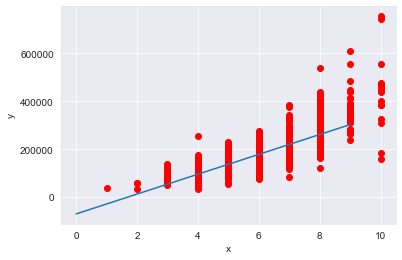

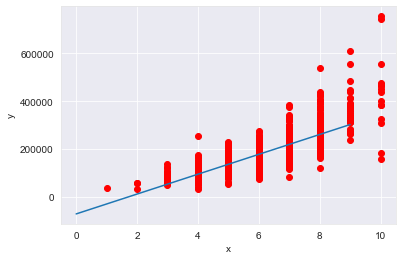

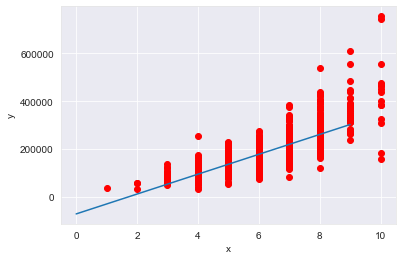

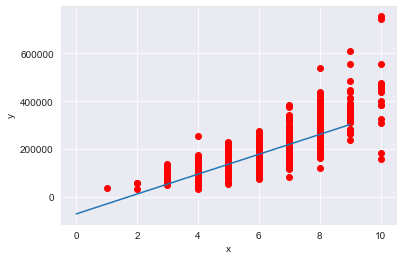

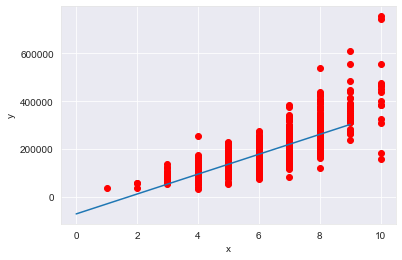

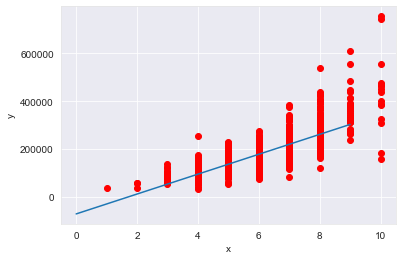

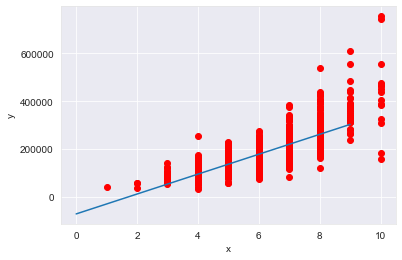

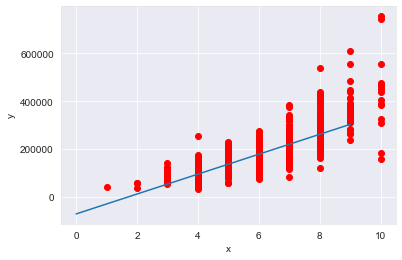

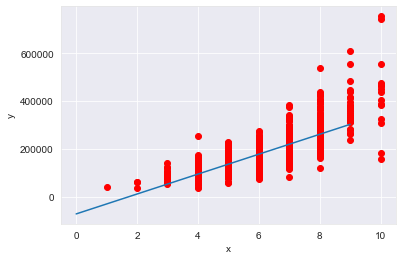

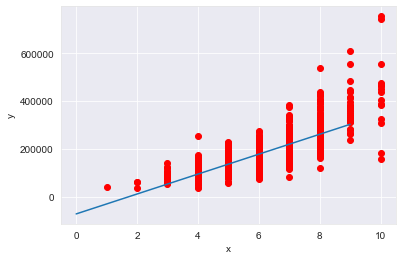

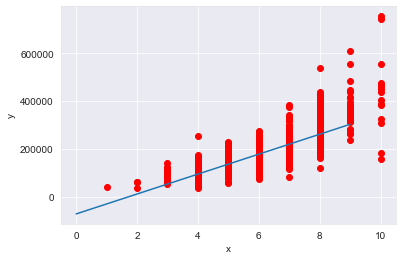

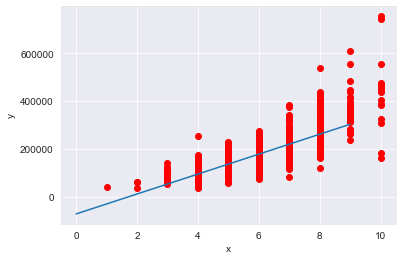

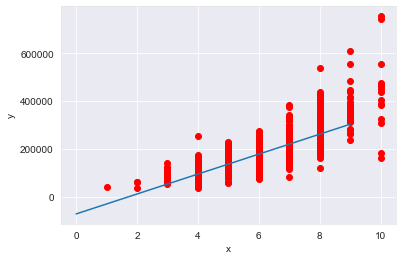

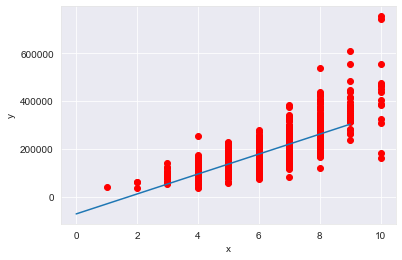

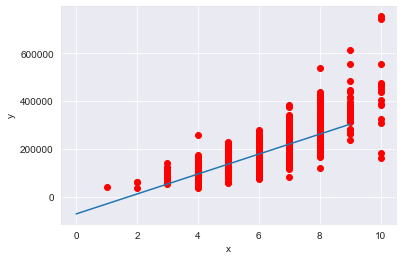

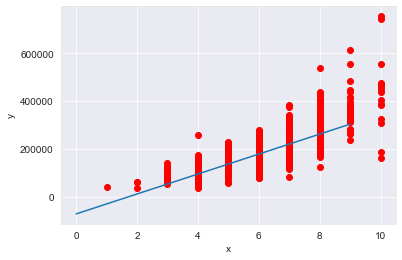

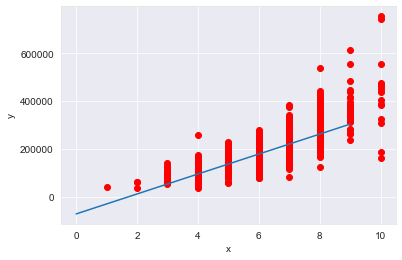

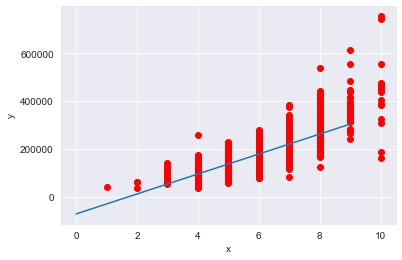

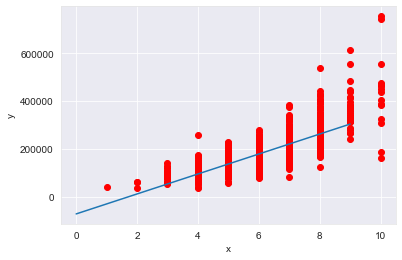

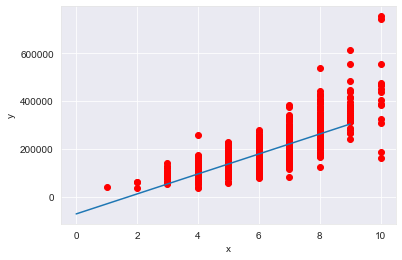

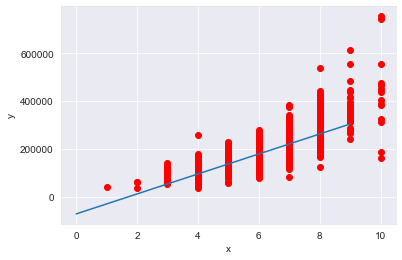

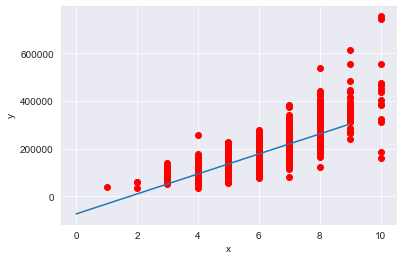

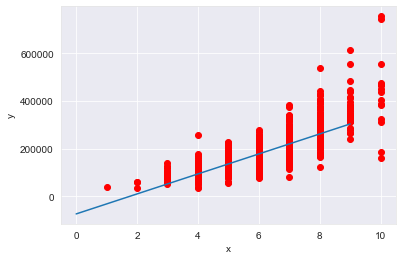

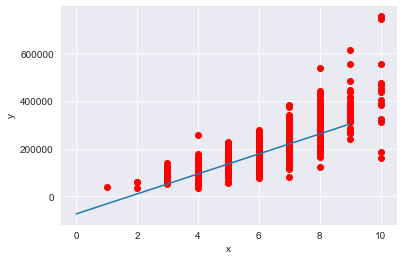

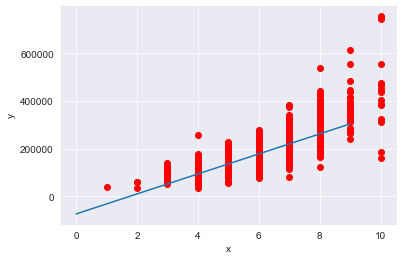

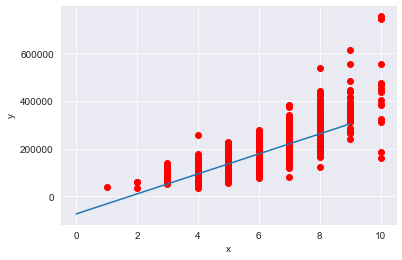

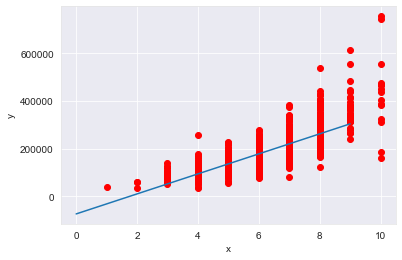

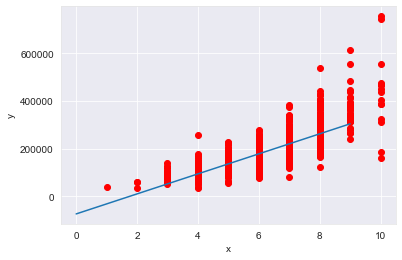

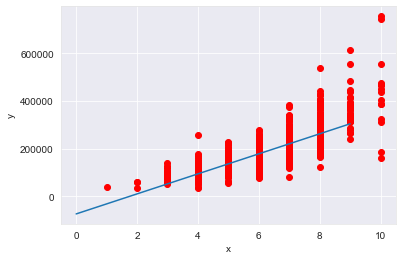

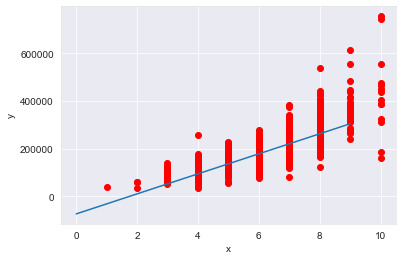

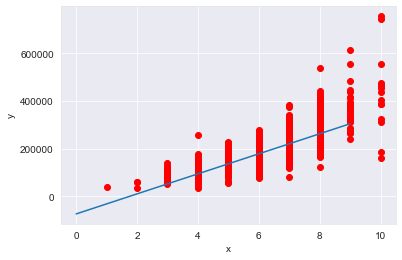

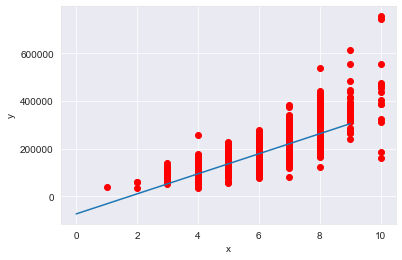

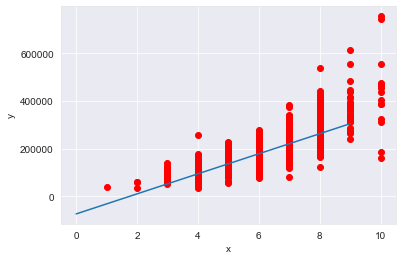

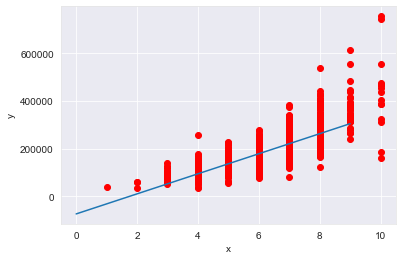

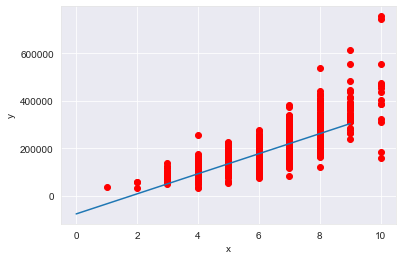

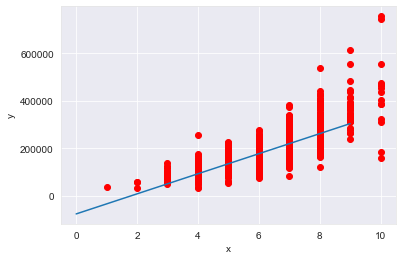

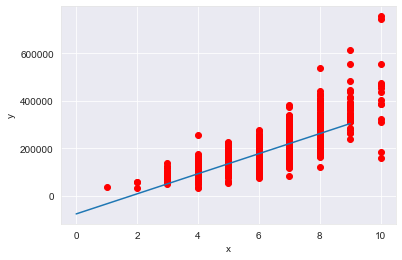

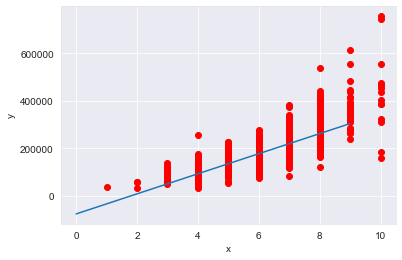

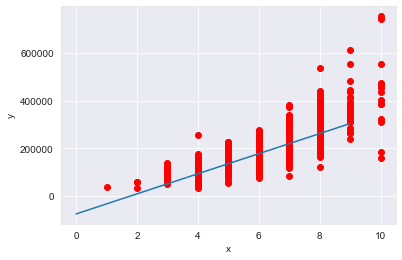

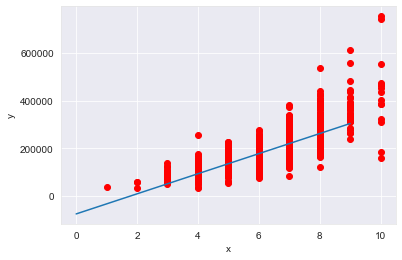

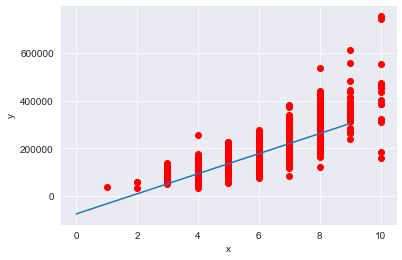

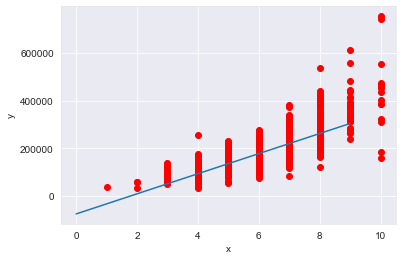

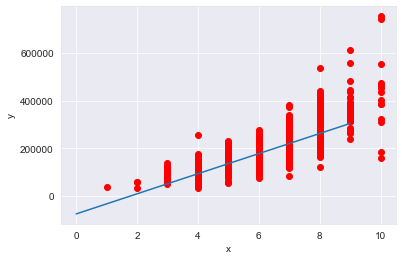

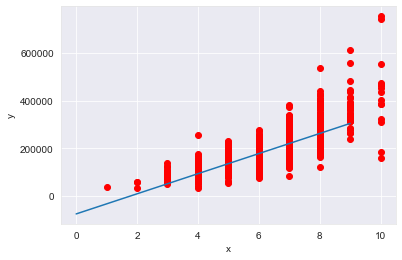

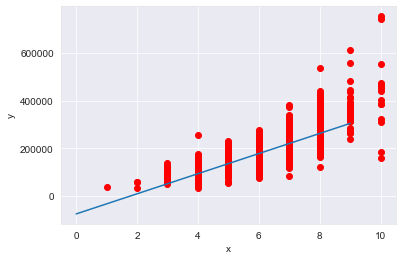

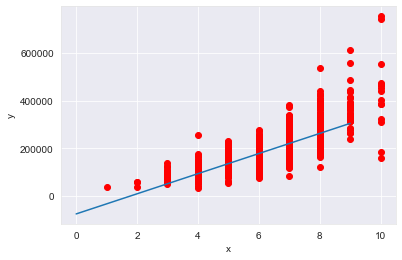

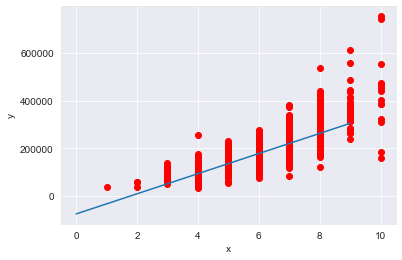

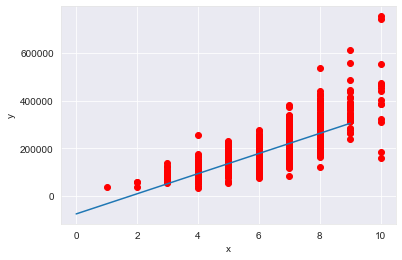

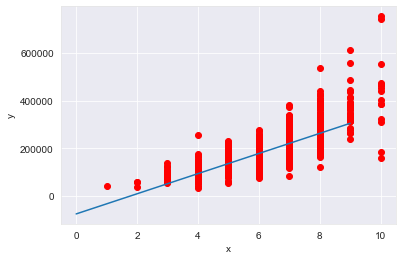

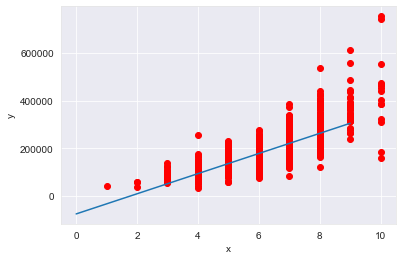

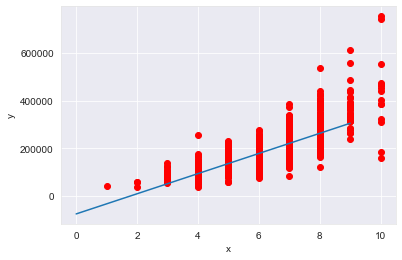

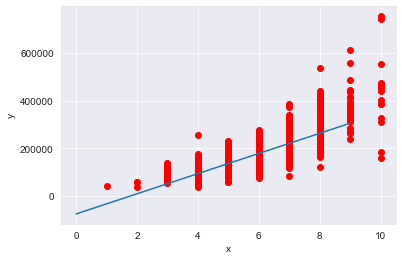

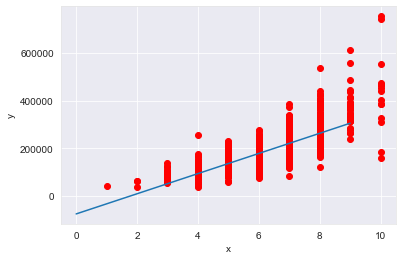

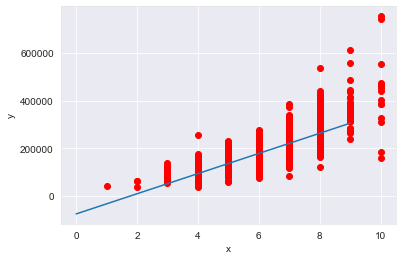

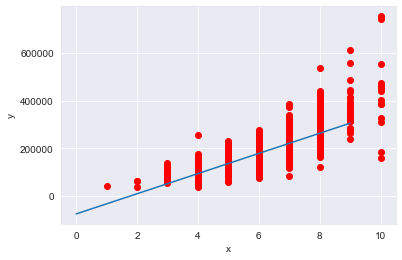

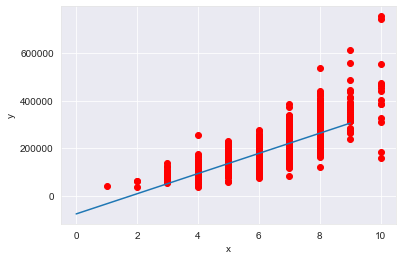

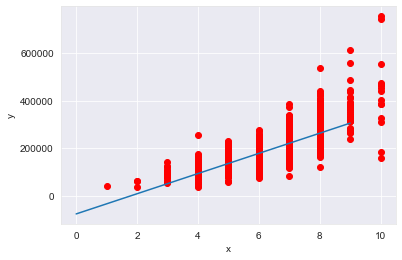

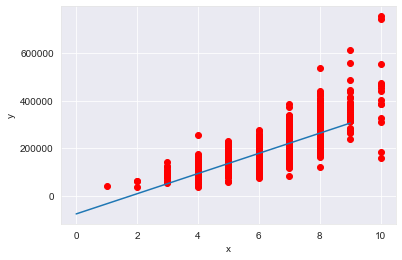

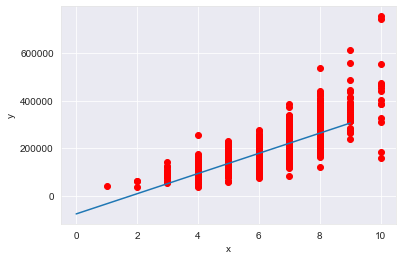

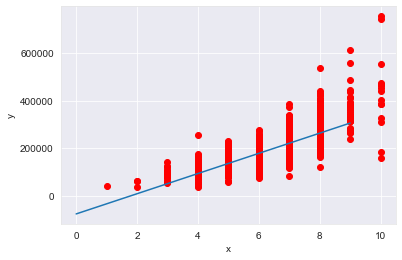

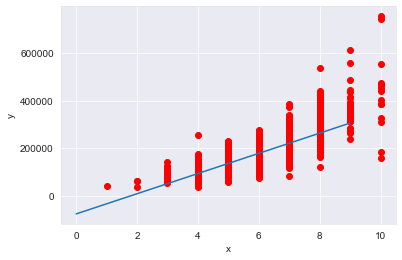

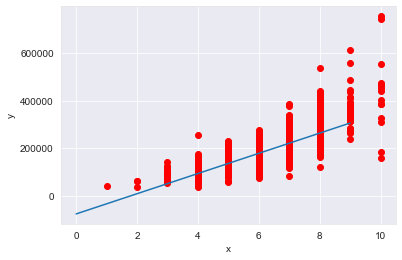

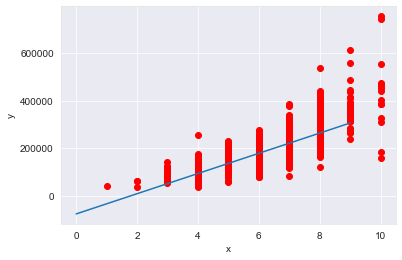

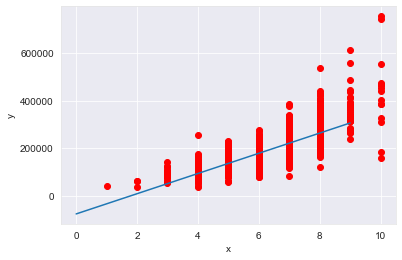

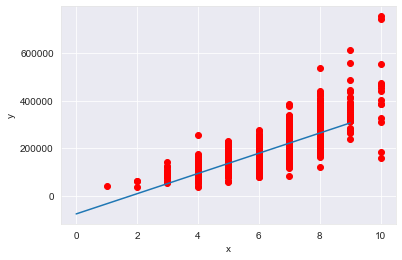

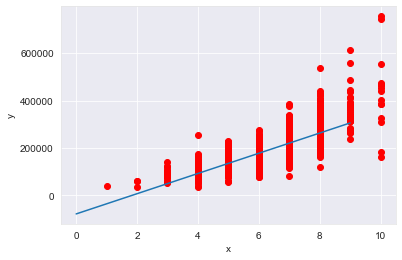

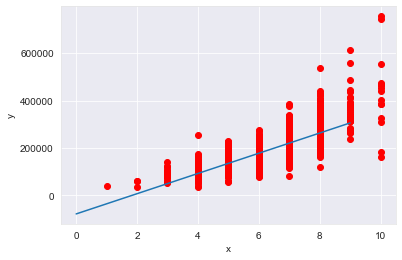

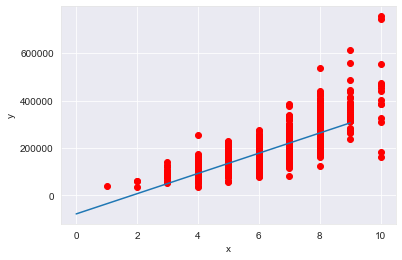

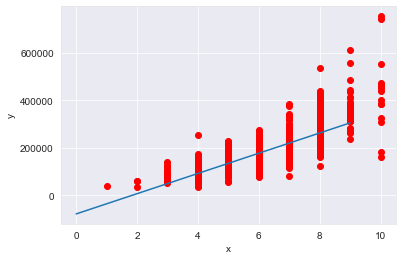

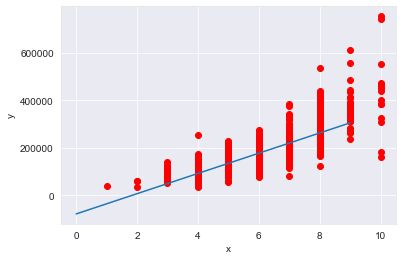

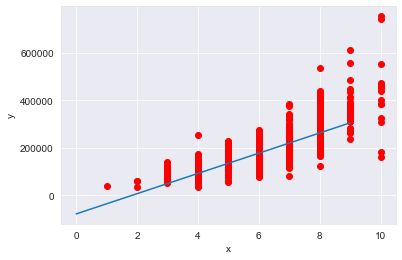

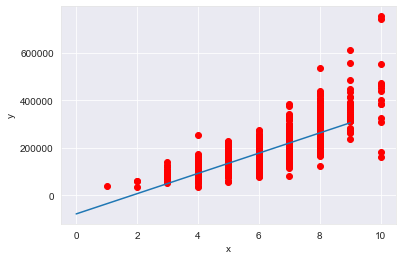

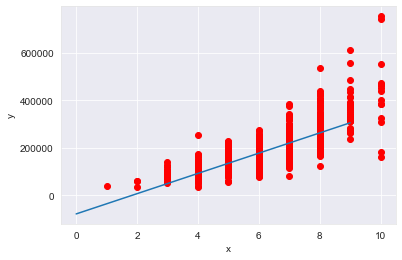

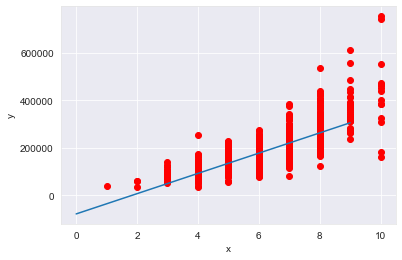

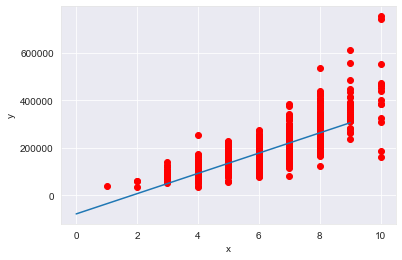

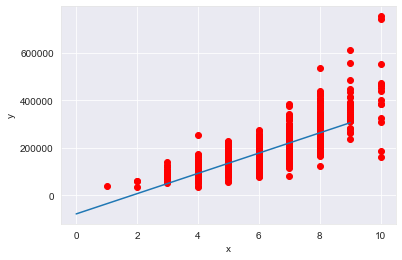

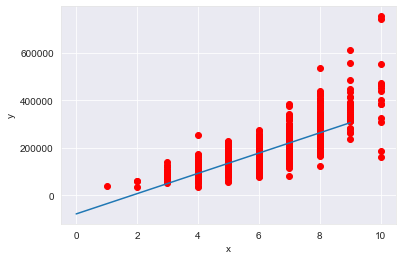

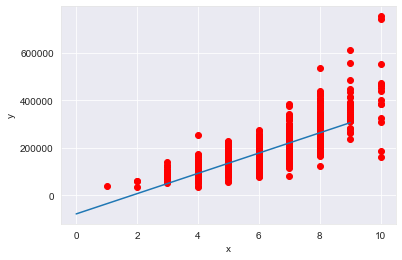

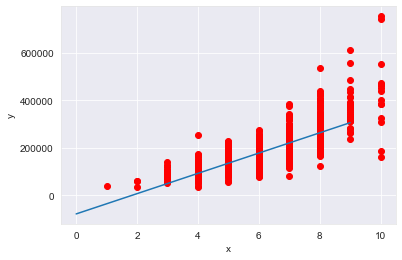

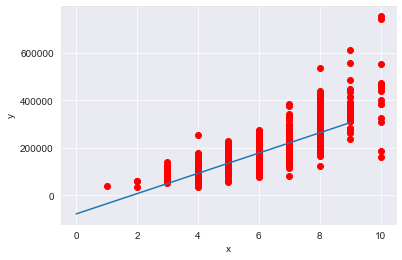

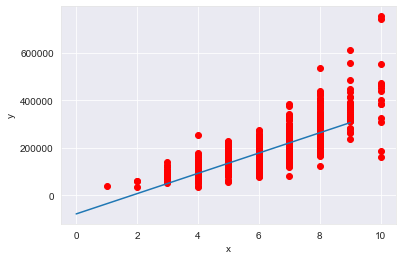

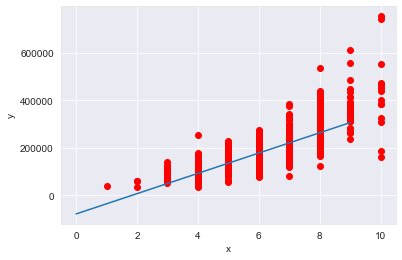

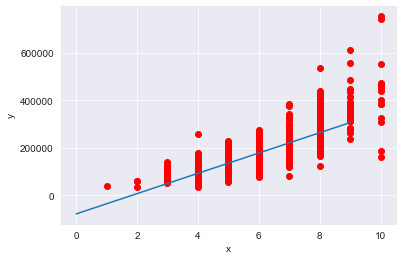

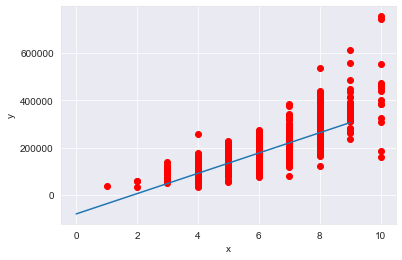

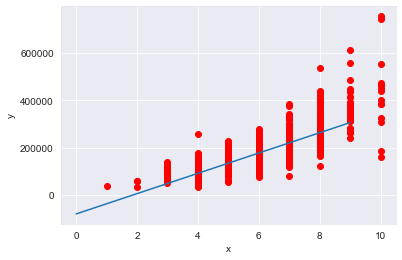

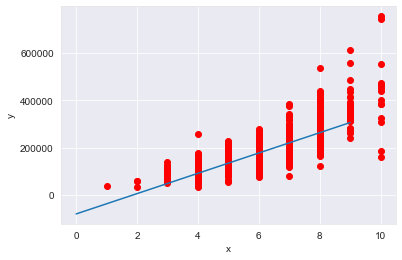

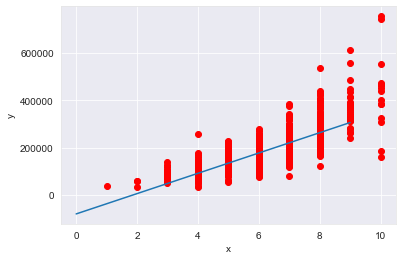

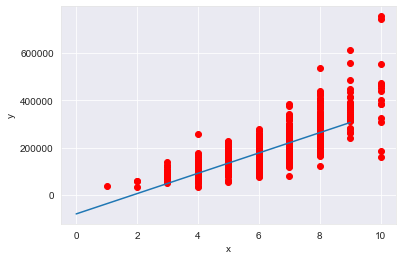

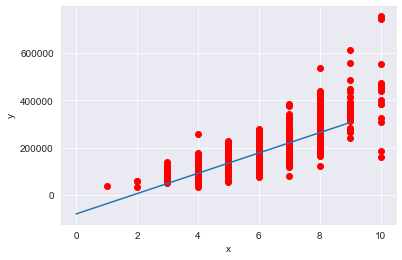

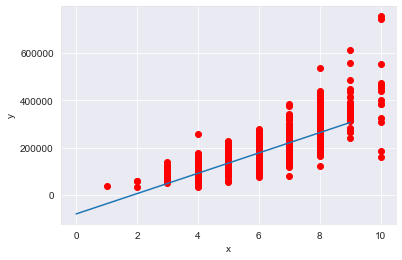

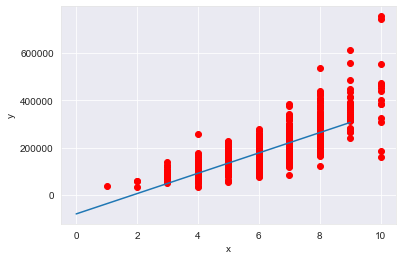

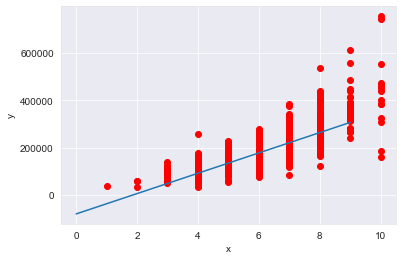

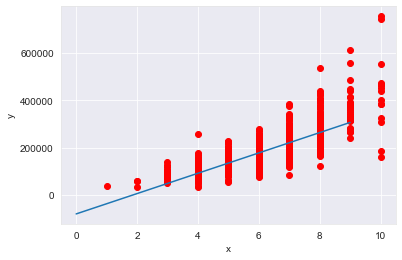

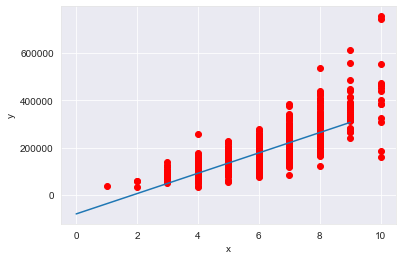

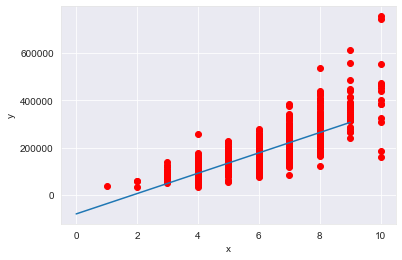

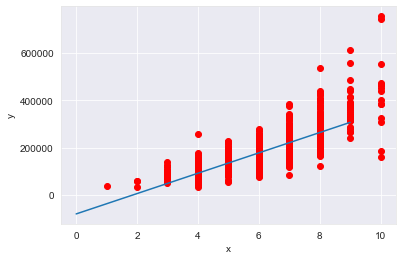

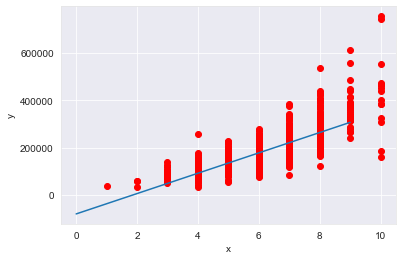

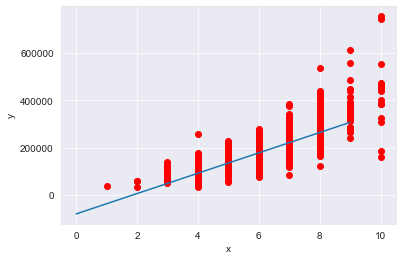

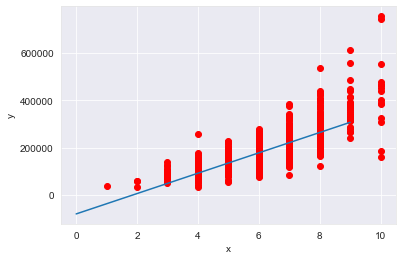

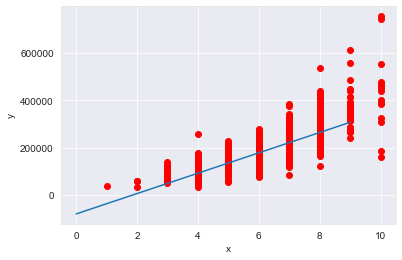

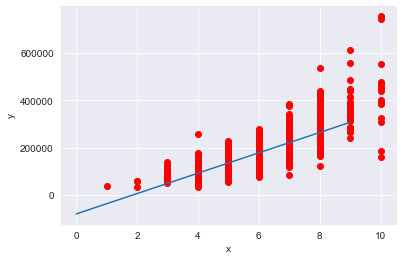

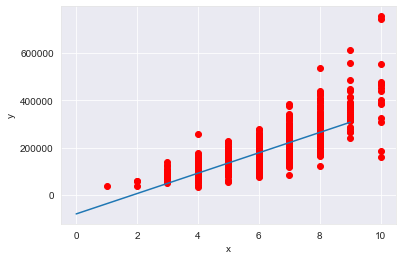

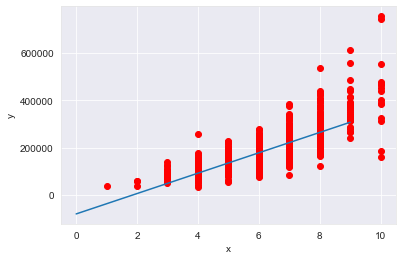

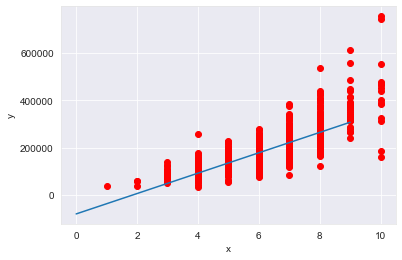

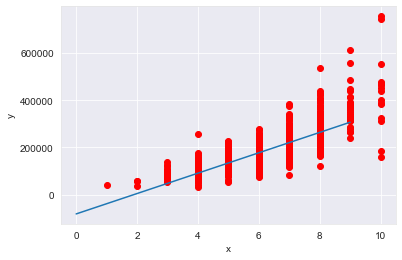

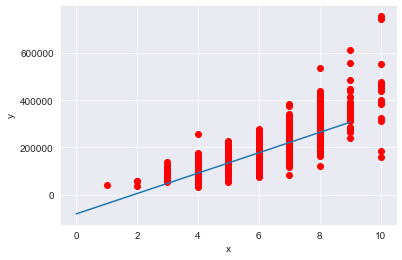

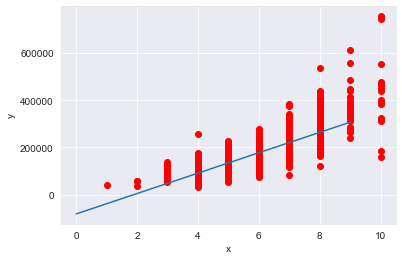

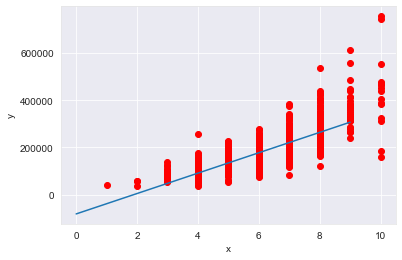

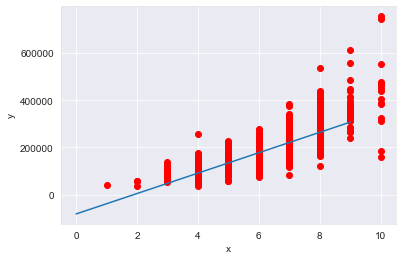

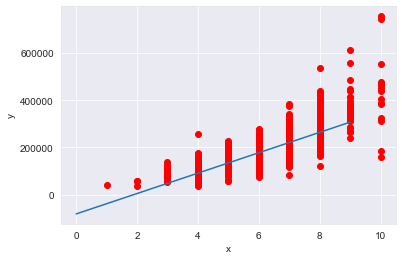

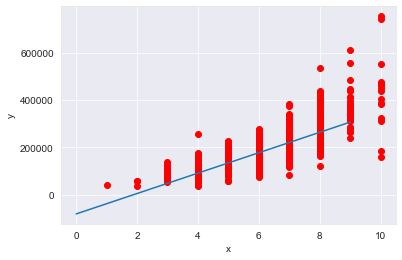

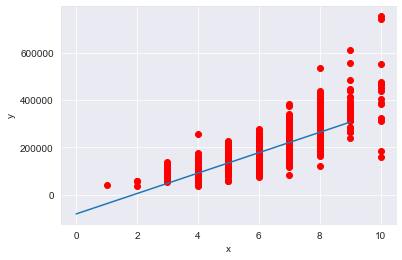

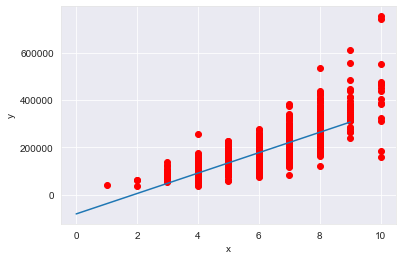

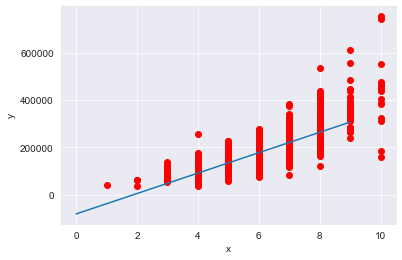

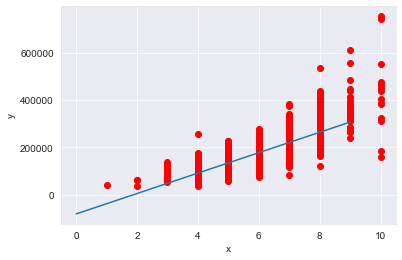

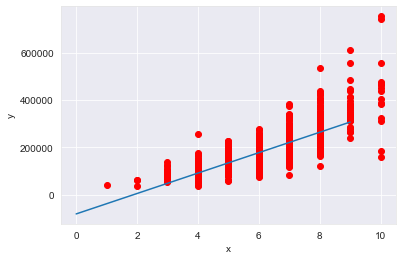

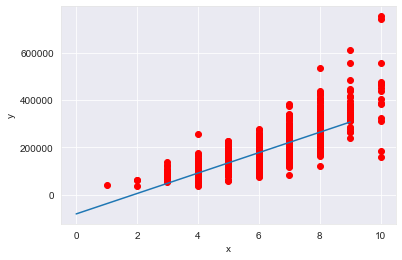

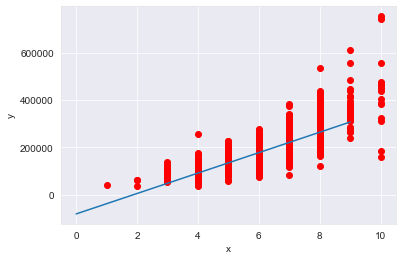

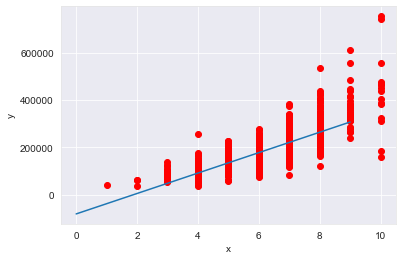

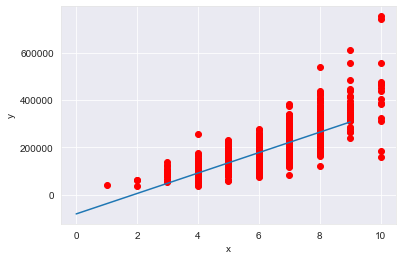

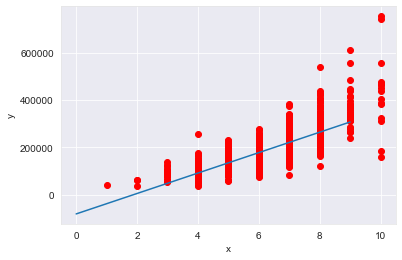

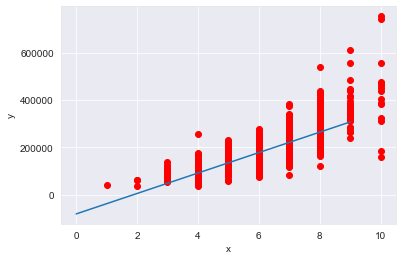

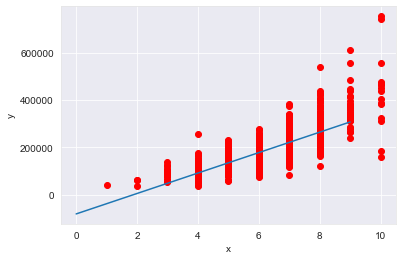

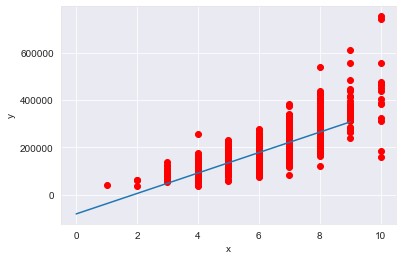

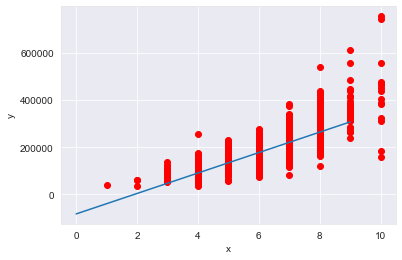

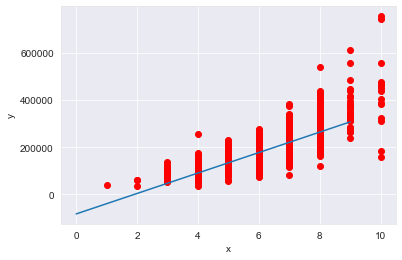

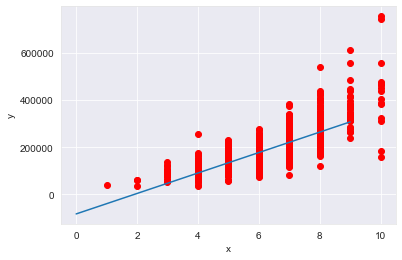

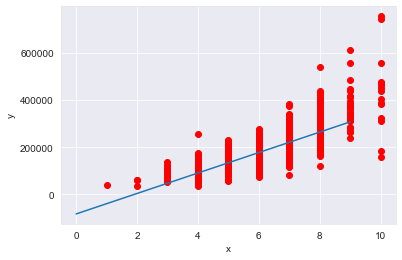

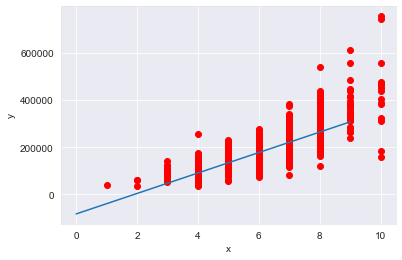

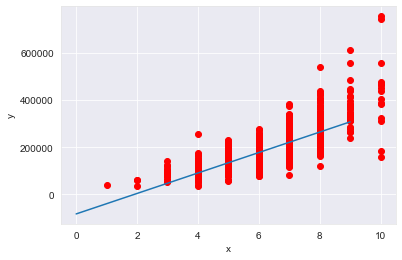

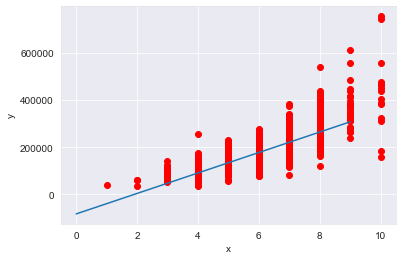

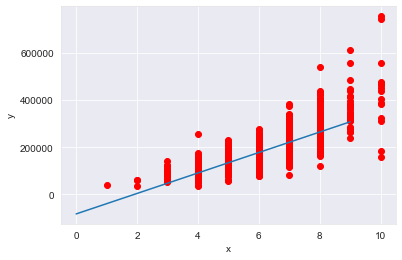

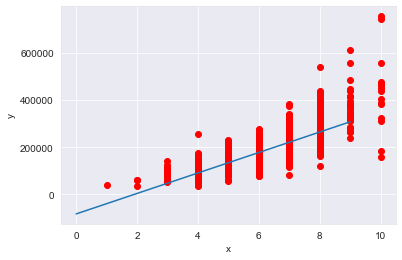

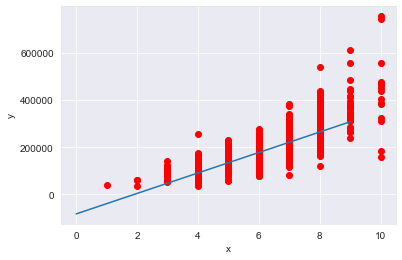

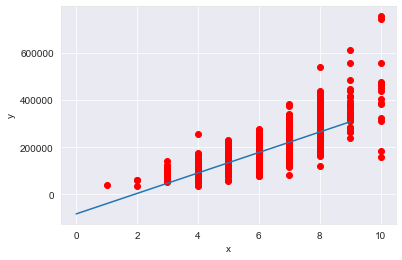

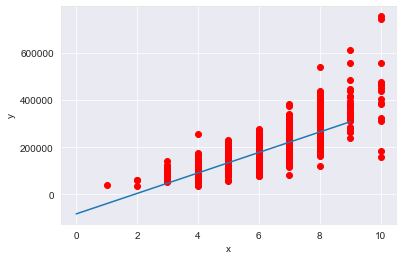

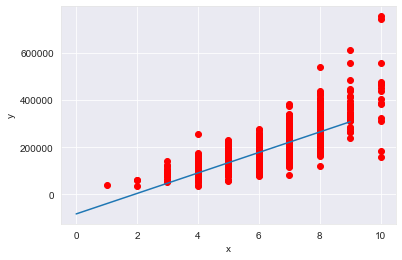

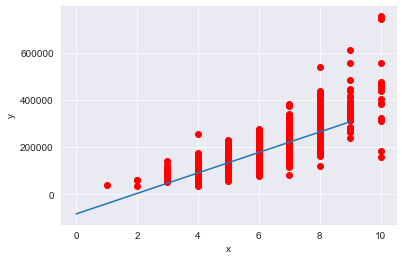

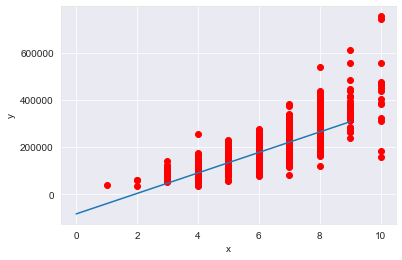

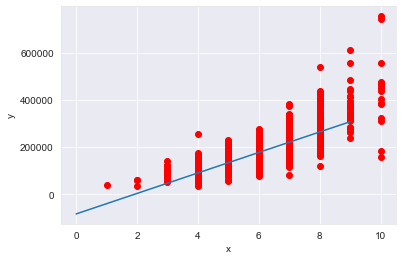

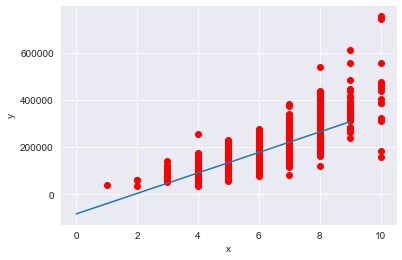

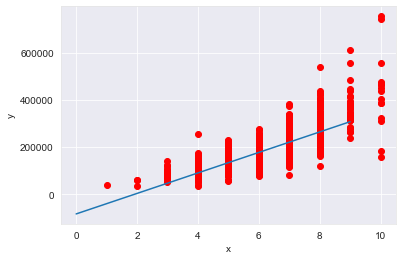

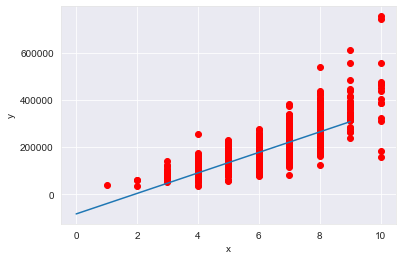

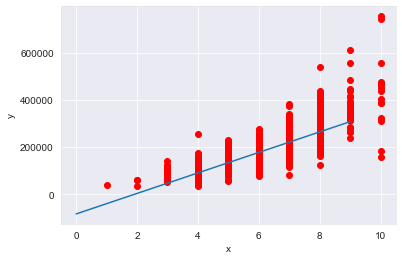

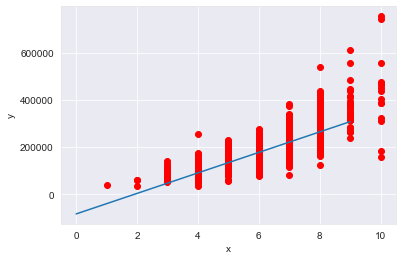

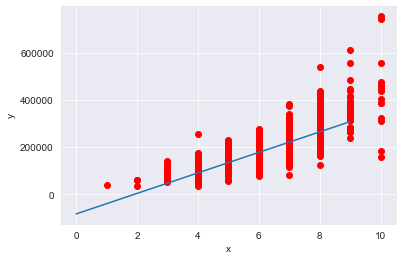

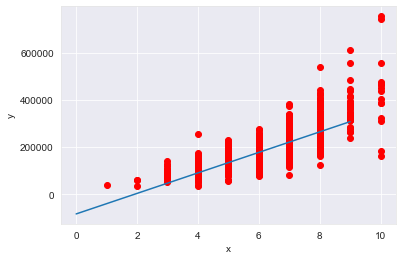

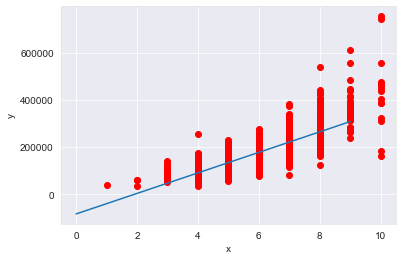

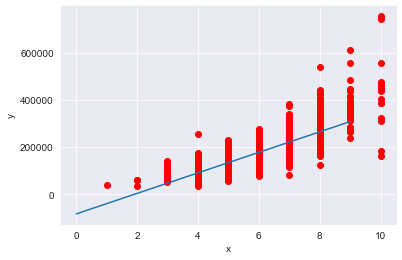

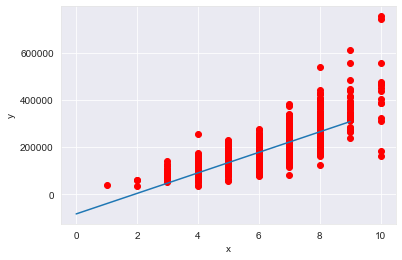

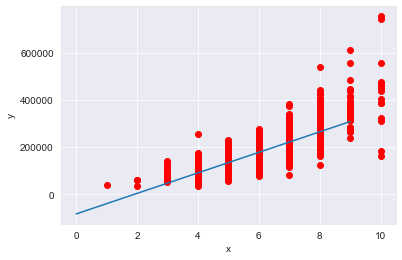

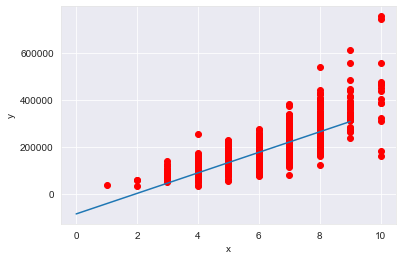

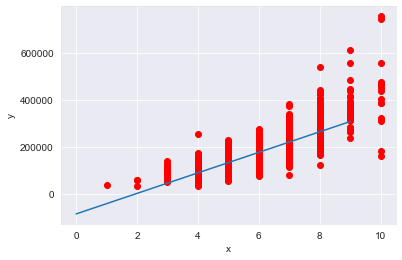

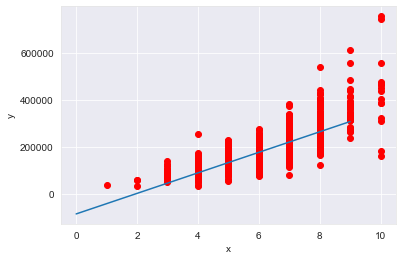

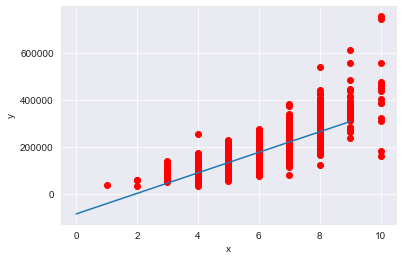

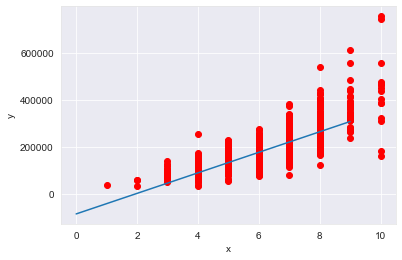

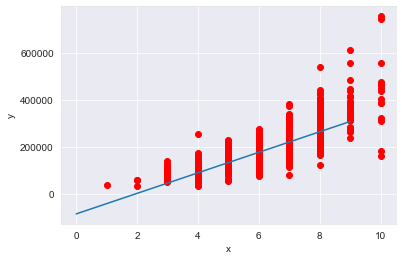

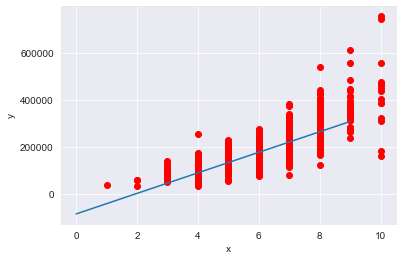

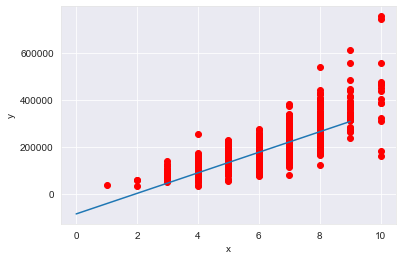

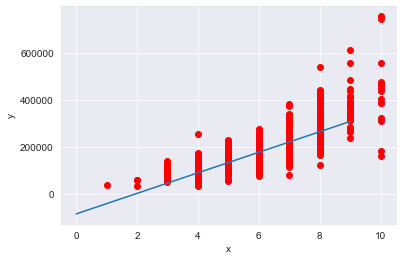

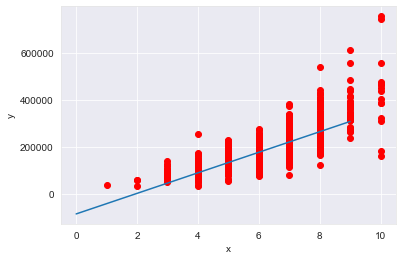

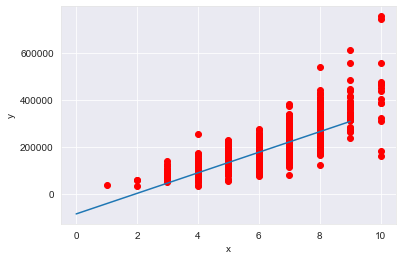

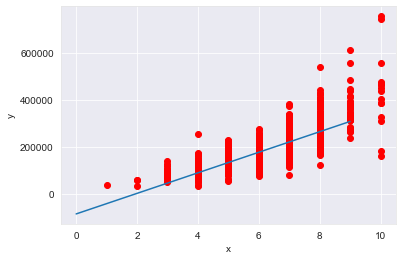

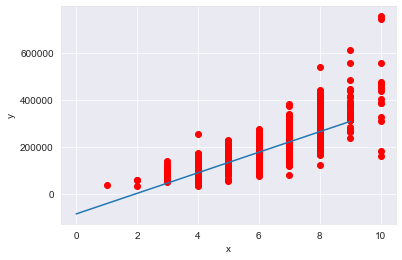

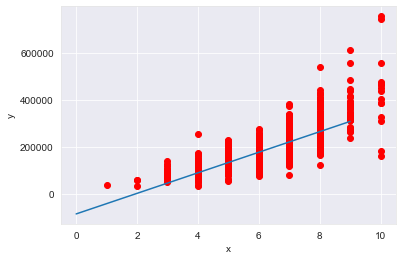

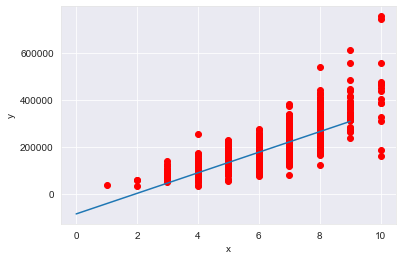

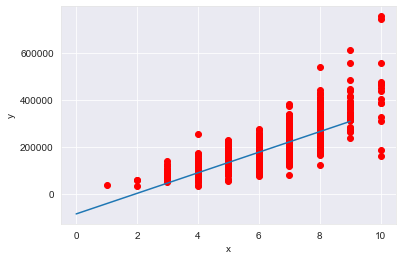

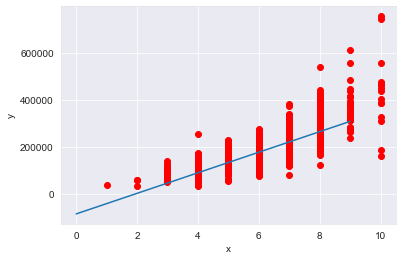

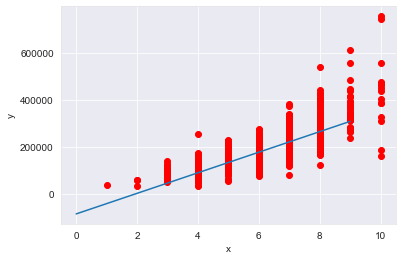

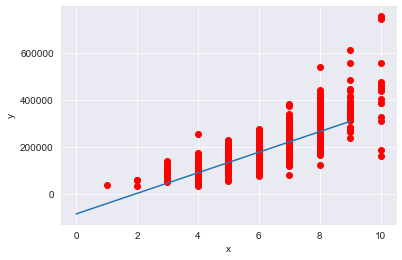

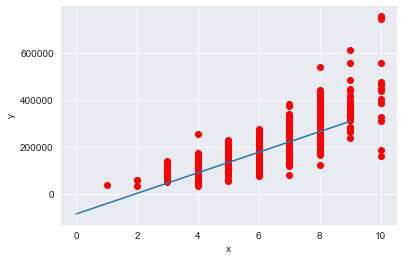

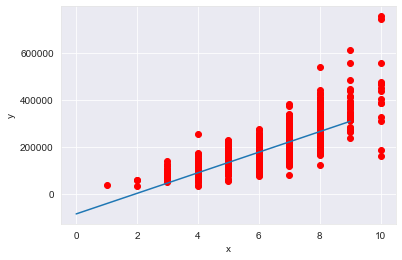

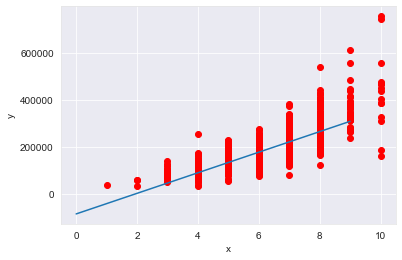

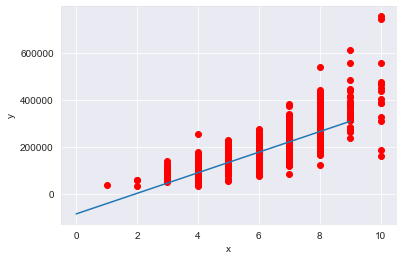

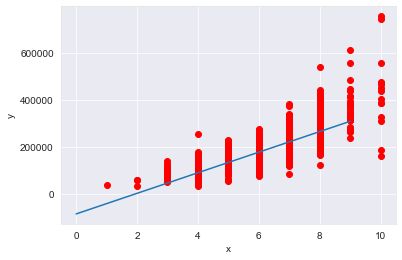

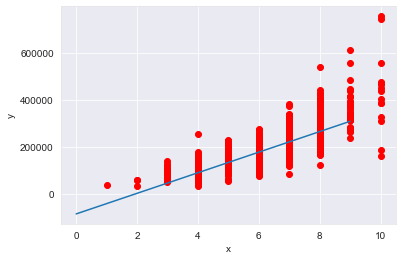

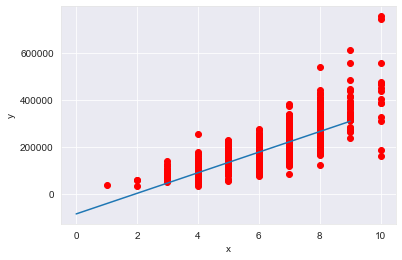

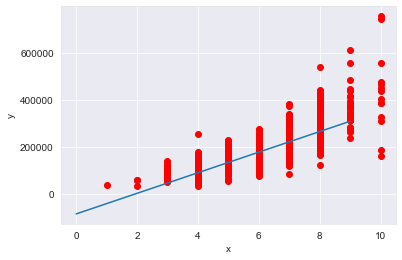

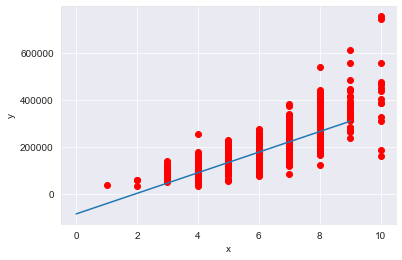

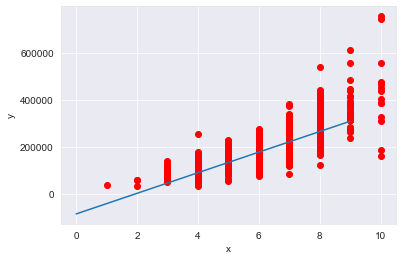

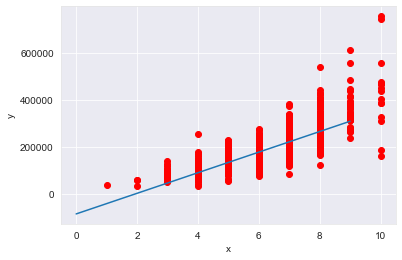

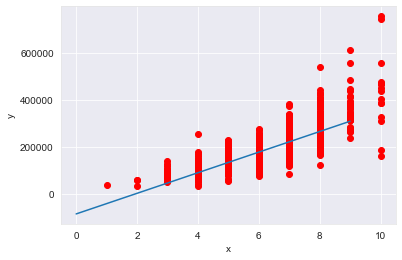

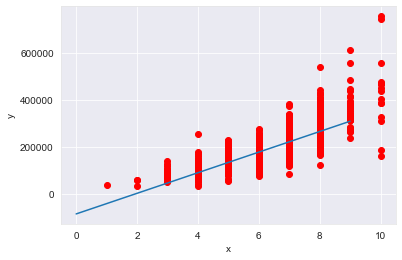

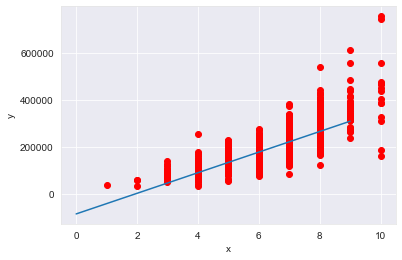

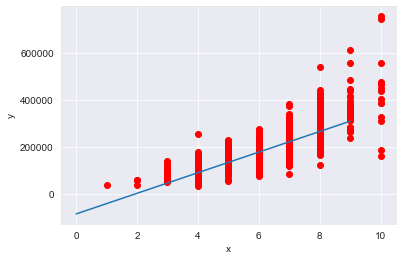

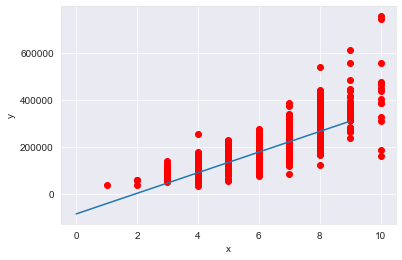

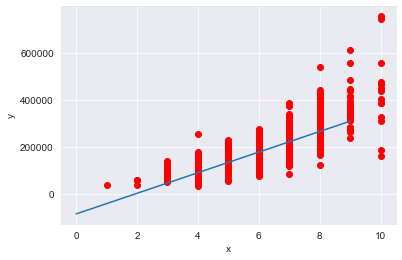

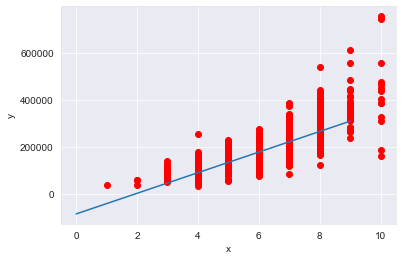

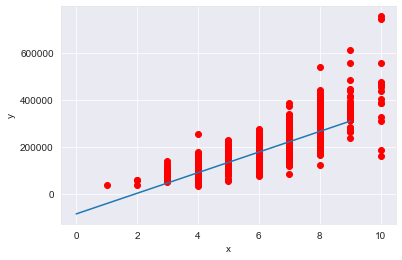

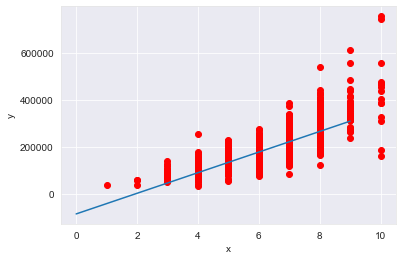

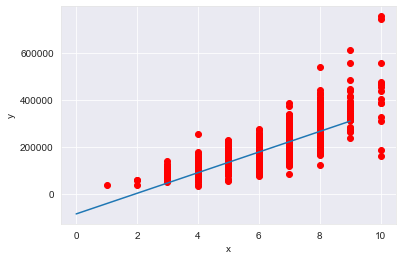

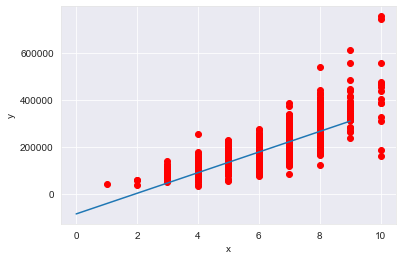

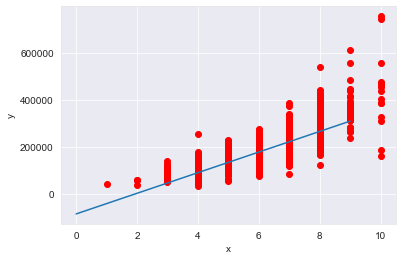

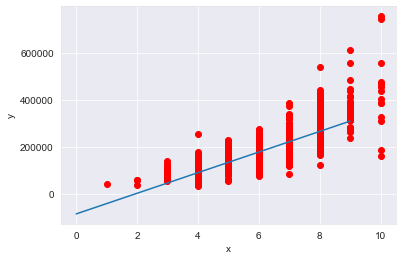

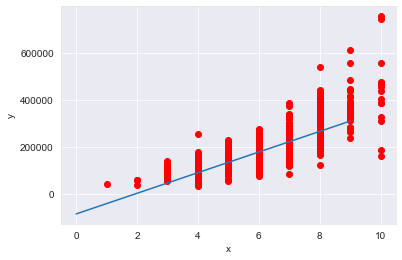

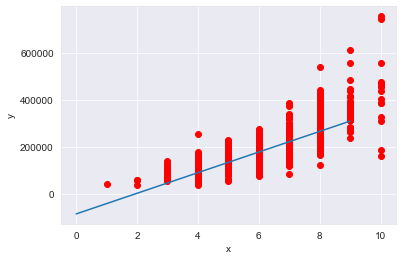

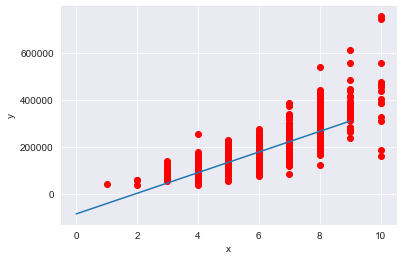

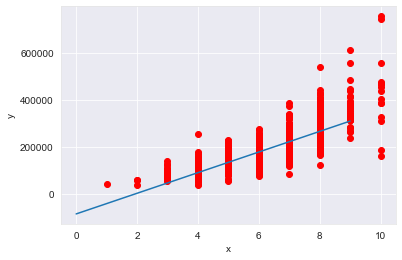

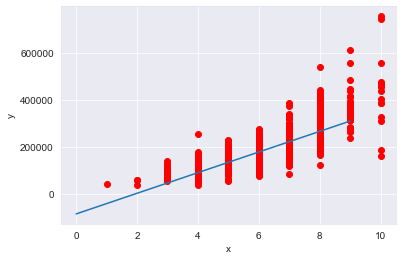

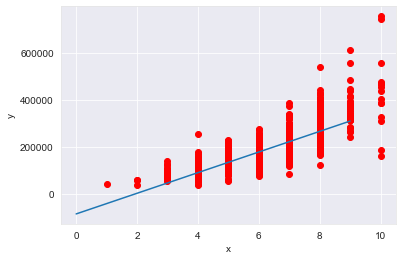

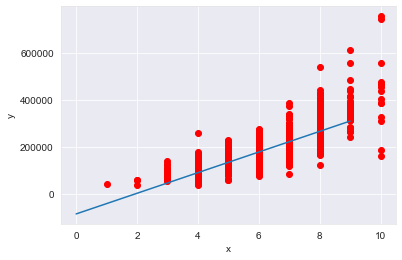

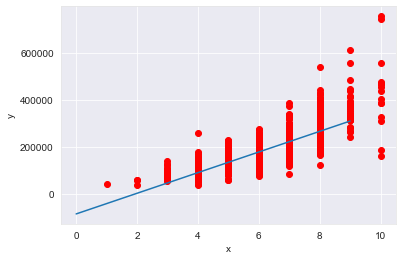

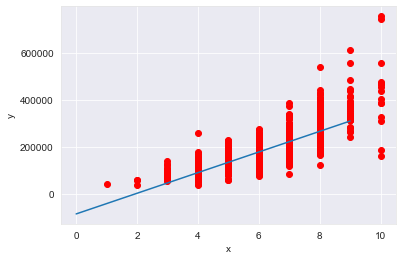

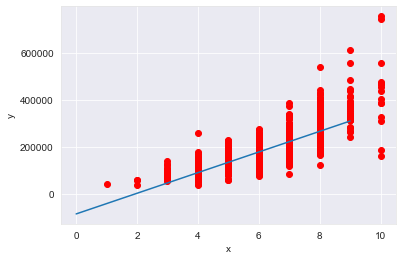

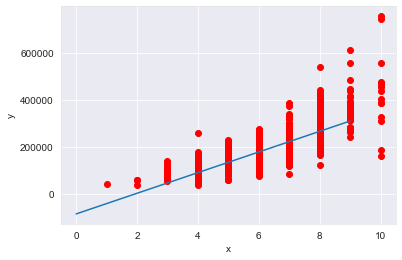

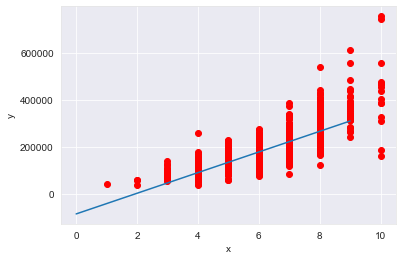

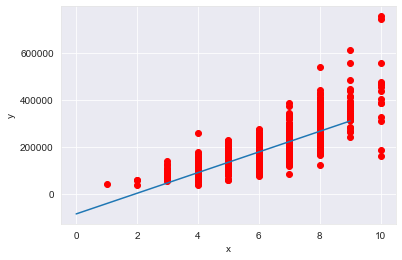

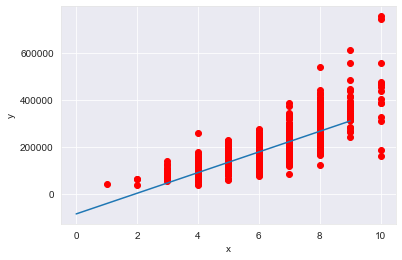

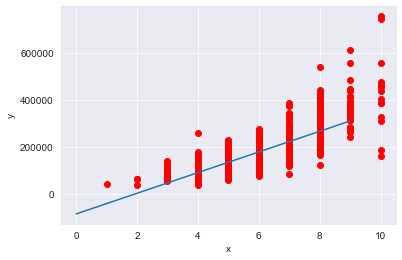

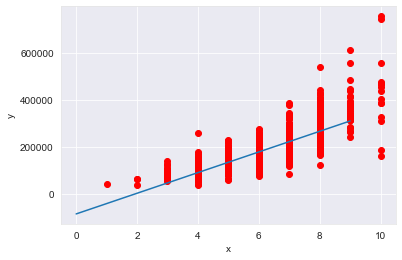

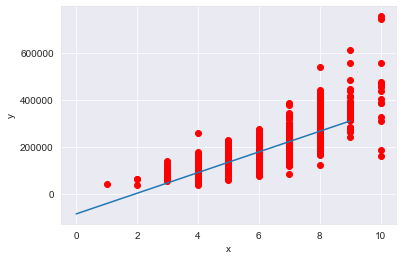

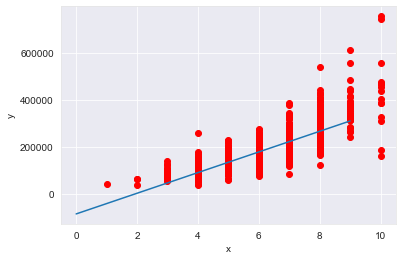

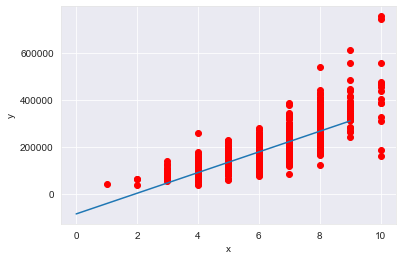

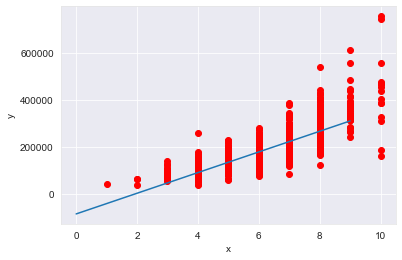

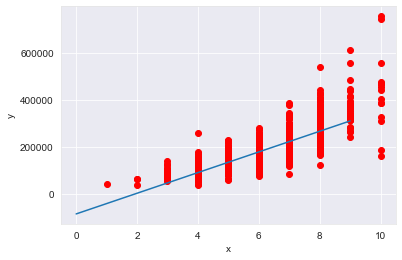

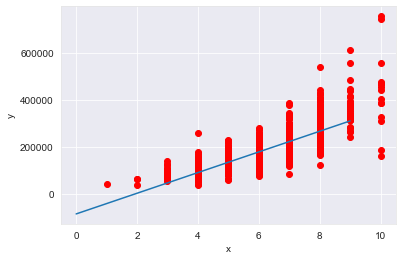

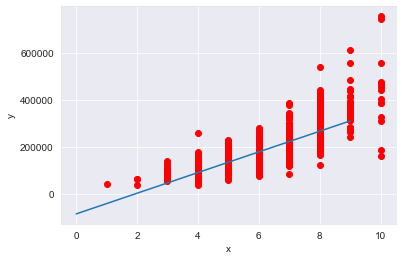

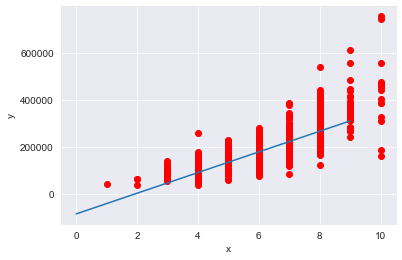

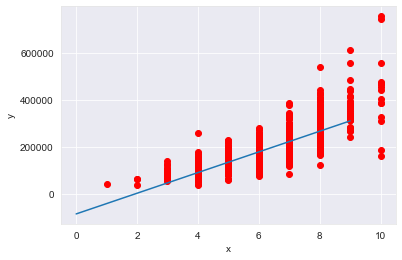

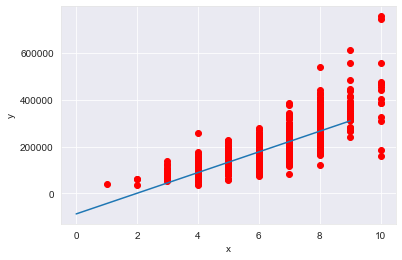

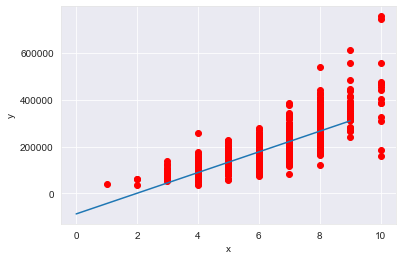

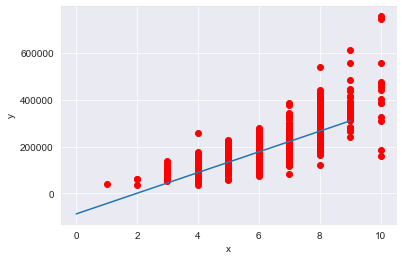

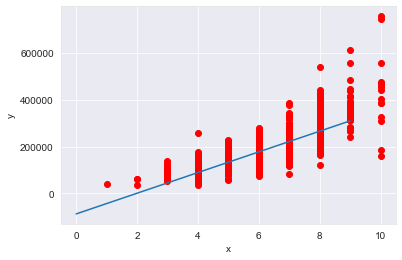

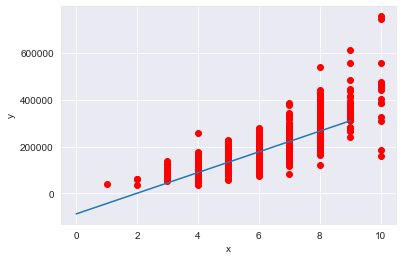

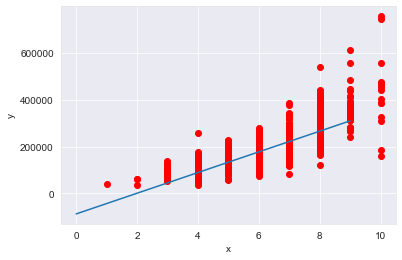

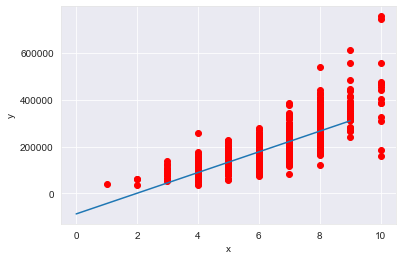

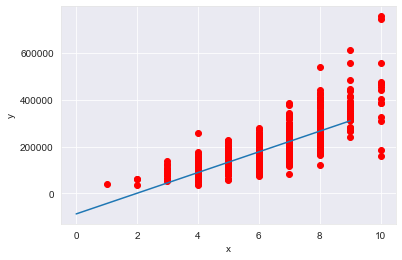

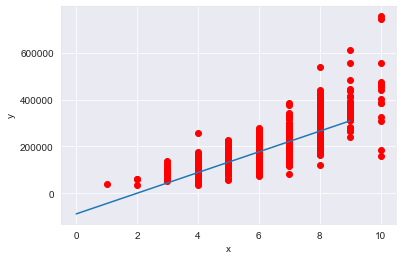

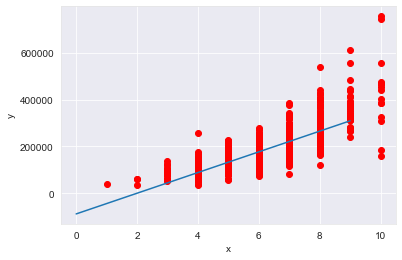

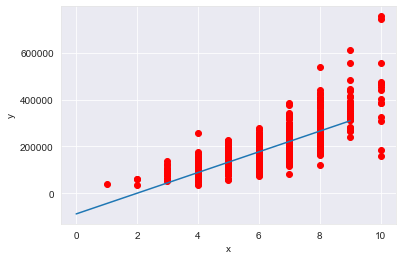

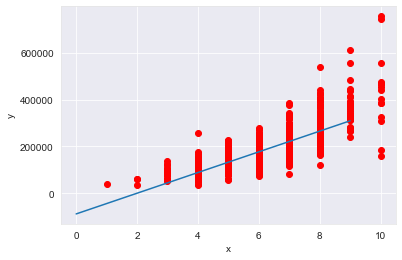

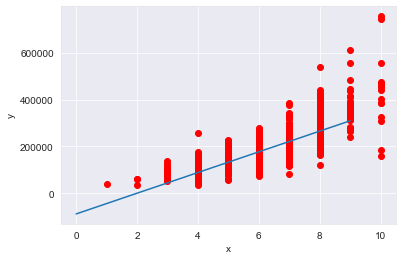

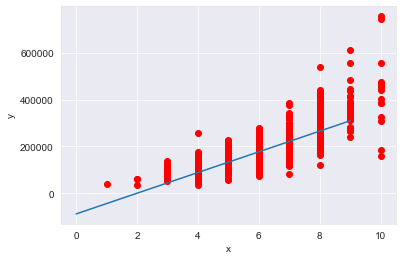

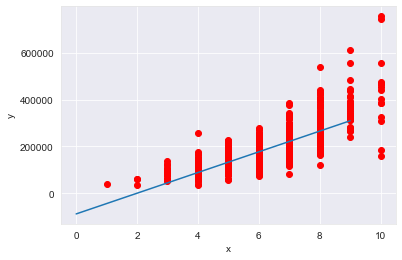

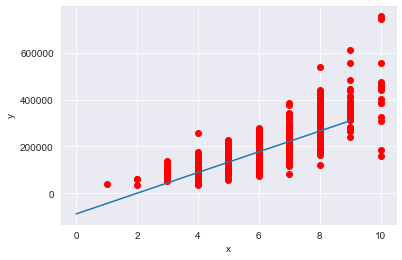

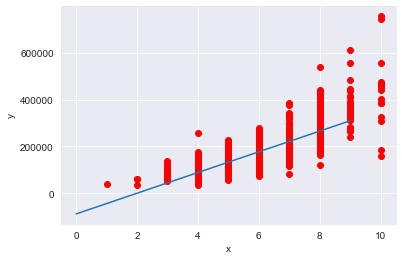

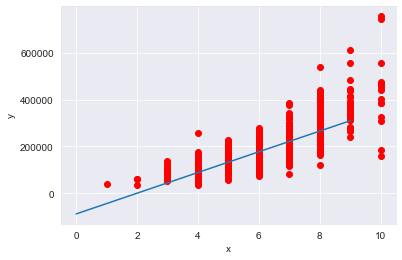

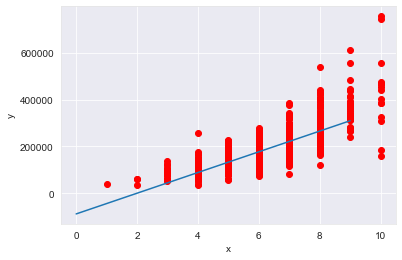

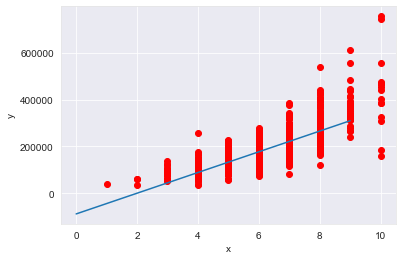

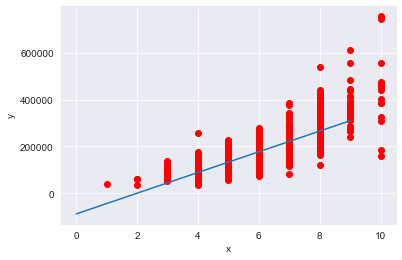

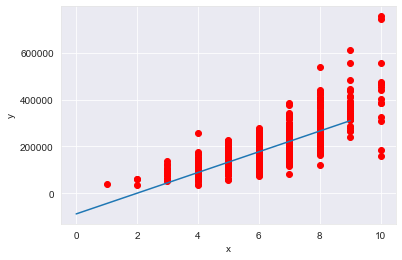

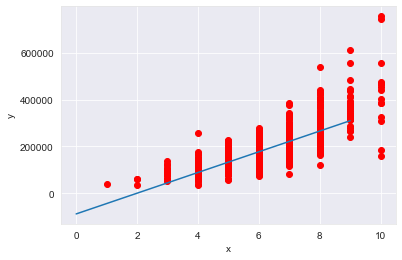

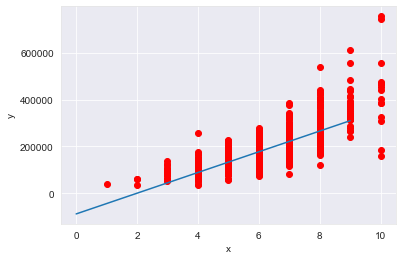

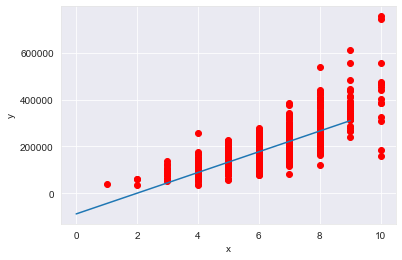

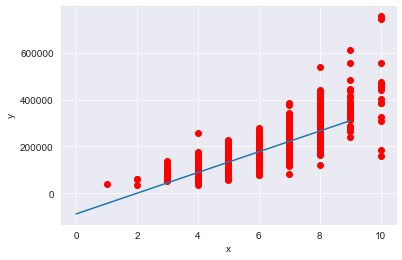

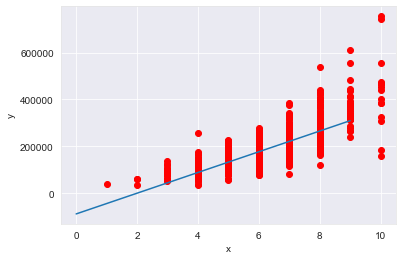

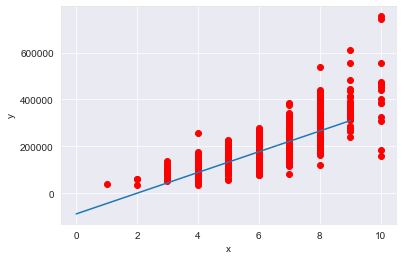

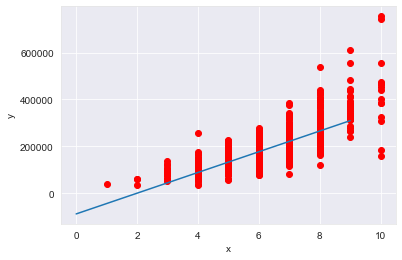

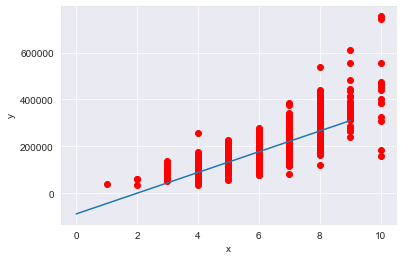

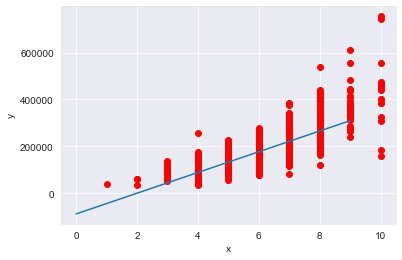

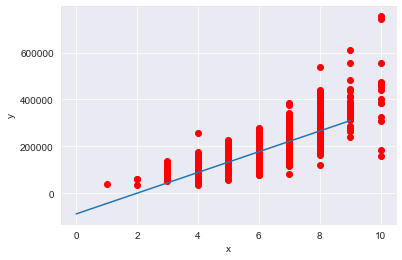

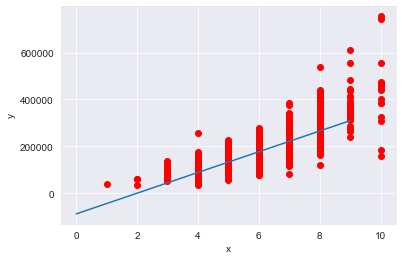

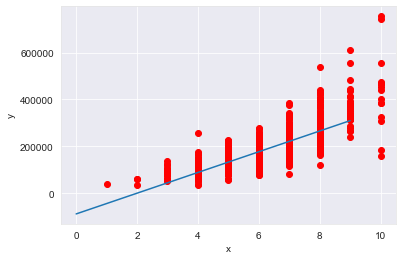

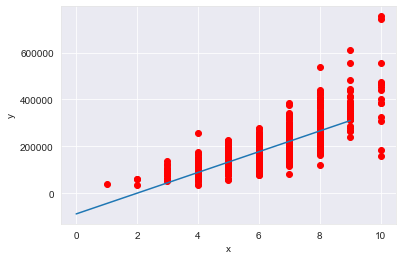

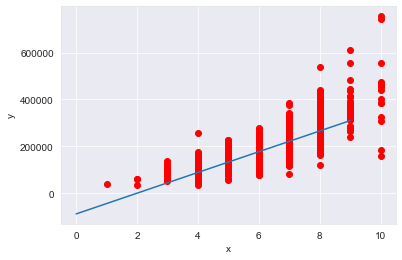

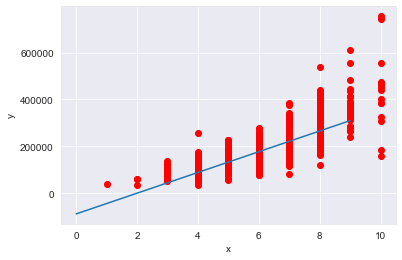

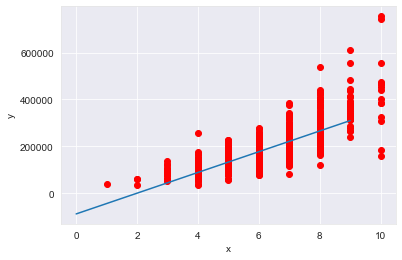

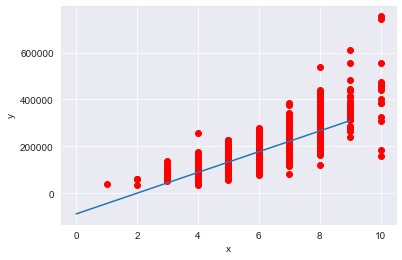

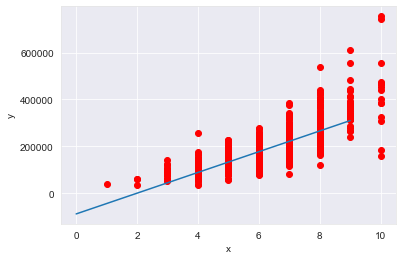

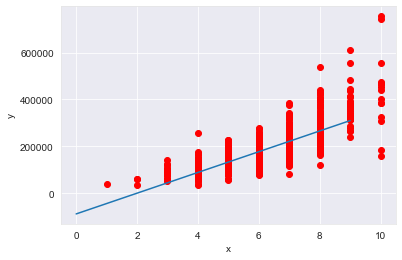

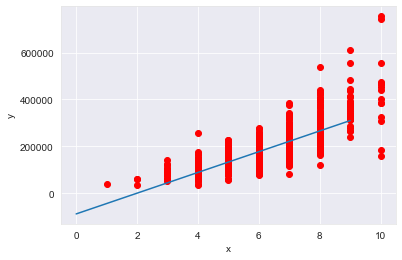

In [156]:
data_train_y =  data_training_df["SalePrice"].values.reshape(-1, 1)
data_train_x =  data_training_df["OverallQual"].values.reshape(-1, 1)



vect_error, model_dic = fun_entrenamiento(data_train_y, data_train_x, 1500 , 50 , 0.04)
funcion_graficar_error(vect_error)
funcion_gra_modelo_tiempo(model_dic, 3, data_train_x,  data_train_y)


In [149]:
1142 * 0.5 + 10.2

581.2

In [ ]:
array([[ 3,  8],
       [12,  9],
       [ 6, 21]])
array([21, 38])